# **Róbert Šafár** & **Matúš Totcimak**
## 1. fáza: *Prieskumná analýza - EDA*
#### Dataset 82
#### Podiel práce 50:50
#
#

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import re

## Načítanie CSV súborov

In [2]:
con = pd.read_csv("dataset82/connections.csv", sep='\t')
proc = pd.read_csv("dataset82/processes.csv", sep='\t')
dev = pd.read_csv("dataset82/devices.csv", sep='\t')
prof = pd.read_csv("dataset82/profiles.csv", sep='\t')

#
# **1.1 Základný opis dát spolu s ich charakteristikami**

#
## *A) Analýza štruktúr dát ako súbory, záznamy*

### Prvý pohľad na dáta.

#### Connections

In [3]:
con.head()

,ts,imei,mwra,c.dogalize,c.android.chrome,c.katana,c.android.gm,c.android.youtube,c.android.vending,c.updateassist,c.UCMobile.x86,c.UCMobile.intl,c.raider
0,2018-05-05 10:00:00,359043379931766007,1.0,8.77752,11.38049,12.34407,9.92776,5.45121,38.91961,0.00350,3.07943,64.98245,1.40681
1,2018-05-05 10:01:00,3590433799317662089,0.0,14.22336,10.57120,11.62779,12.58529,10.95140,59.10202,0.00018,86.13880,68.26242,45.71979
2,2018-05-05 10:02:00,863033069630348974,1.0,8.54406,10.56842,11.75027,7.99912,13.79062,67.85473,0.15281,89.57752,11.52702,94.70739
3,2018-05-05 10:03:00,8630330696303482303,0.0,8.45038,12.20856,12.93420,8.91733,13.61598,57.52227,0.09174,77.12259,83.83905,37.76103
4,2018-05-05 10:04:00,3590433799317661214,1.0,8.43303,12.91601,6.59161,13.28375,11.84398,61.12345,0.00431,77.10114,53.79920,35.20326


#### Processes

In [4]:
proc.head()

,ts,imei,mwra,p.android.packageinstaller,p.android.externalstorage,p.system,p.android.chrome,p.android.settings,p.android.documentsui,p.android.gm,...,p.inputmethod.latin,p.process.gapps,p.olauncher,p.browser.provider,p.notifier,p.gms.persistent,p.android.defcontainer,p.android.vending,p.simulator,p.dogalize
0,2018-05-05 10:00:00,359043379931766007,1.0,11.90416,11.19779,7.60383,9.18353,8.55184,11.19148,8.30220,...,66.53657,22.62795,68.82046,5.34638,60.71954,91.44208,32.74843,72.98707,91.50713,38.12265
1,2018-05-05 10:01:00,3590433799317662089,0.0,8.74523,7.65554,9.49404,8.20213,6.32215,12.33170,11.65786,...,46.12881,1.75228,63.95436,92.52467,3.56652,54.81245,47.19235,34.25583,64.09818,74.40462
2,2018-05-05 10:02:00,863033069630348974,1.0,15.68790,11.98031,12.67268,11.29634,11.47538,10.38642,9.07927,...,58.32725,26.62538,59.50626,25.68333,95.57546,70.33923,9.74088,51.66399,6.16361,79.52068
3,2018-05-05 10:03:00,8630330696303482303,0.0,15.17766,3.39842,10.01515,5.53874,3.57674,9.83642,13.01602,...,63.78355,95.12515,36.75006,82.01474,30.62274,81.77126,27.99291,33.84844,16.02638,53.70138
4,2018-05-05 10:04:00,3590433799317661214,1.0,12.11010,6.01721,7.15878,15.25489,13.88784,7.34559,7.38960,...,48.84318,65.04820,50.38813,0.89319,56.53053,71.65832,19.58884,98.09707,93.80860,27.96079


#### Devices

In [5]:
dev.head()

,latitude,longitude,store_name,code,location,imei
0,52.71083,5.74861,Emmeloord,NL,Europe/Amsterdam,8630330696303481982
1,58.04254,65.27258,Tavda,RU,Asia/Yekaterinburg,863033069630348024
2,50.75932,25.34244,Lutsk,UA,Europe/Kyiv,863033069630348503
3,61.72744,17.10558,Hudiksvall,SE,Europe/Stockholm,8630330696303481750
4,6.03333,37.55000,Arba Minch,ET,Africa/Addis_Ababa,863033069630348081


#### Profiles

In [6]:
prof.head()

,job,current_location,imei,user_id,address,ssn,company,birthdate,registration,mail,username,name
0,NaN,"(Decimal('5.7948455'), Decimal('32.423690'))",8630330696303481628,1984,"33086 Matthew Glens\r\nEast Dennisport, VI 88422",249-12-0967,Gilbert-Wright,1946-02-05,2019/11/22,sarah28@yahoo.com,ehorne,Alicia Norman
1,NaN,"(Decimal('-31.286773'), Decimal('71.138696'))",863033069630348024,1404,"766 Barnes Heights Suite 236\r\nMariafurt, OR ...",255-55-3436,"Francis, Nichols and Mendez",2005-03-16,2024-08-19,grahamjoshua@yahoo.com,hking,Samuel Fields
2,NaN,"(Decimal('53.8732785'), Decimal('-158.482758'))",3590433799317662469,1645,NaN,578-31-7405,"Combs, Sanchez and Calhoun",NaN,2021/10/03,belllaura@yahoo.com,morganchase,Thomas Lloyd
3,"Engineer, building services","(Decimal('-44.6071825'), Decimal('68.606055'))",8630330696303481388,854,"1088 Weaver Prairie\r\nPriceton, MN 17706",079-83-9171,"Cole, Moore and Grimes",1993-09-29,"07/31/2024, 00:00:00",shieldsrichard@hotmail.com,david66,Edward Brown
4,NaN,"(Decimal('-19.3991525'), Decimal('-142.727922'))",3590433799317661917,1803,"81692 Park Greens\r\nHernandezstad, WV 32899",624-99-9580,Villarreal-Middleton,NaN,"05/16/2021, 00:00:00",jason79@yahoo.com,scott17,Joseph Hart


### Zobrazenie základných informácií o jednotlivých DF.

#### Connections

In [7]:
con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15163 entries, 0 to 15162
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15163 non-null  object 
 1   imei               15163 non-null  int64  
 2   mwra               15163 non-null  float64
 3   c.dogalize         15163 non-null  float64
 4   c.android.chrome   15163 non-null  float64
 5   c.katana           15163 non-null  float64
 6   c.android.gm       15163 non-null  float64
 7   c.android.youtube  15163 non-null  float64
 8   c.android.vending  15163 non-null  float64
 9   c.updateassist     15163 non-null  float64
 10  c.UCMobile.x86     15163 non-null  float64
 11  c.UCMobile.intl    15163 non-null  float64
 12  c.raider           15163 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


#### Processes

In [8]:
proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15163 entries, 0 to 15162
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15163 non-null  object 
 1   imei                        15163 non-null  int64  
 2   mwra                        15163 non-null  float64
 3   p.android.packageinstaller  15163 non-null  float64
 4   p.android.externalstorage   15163 non-null  float64
 5   p.system                    15163 non-null  float64
 6   p.android.chrome            15163 non-null  float64
 7   p.android.settings          15163 non-null  float64
 8   p.android.documentsui       15163 non-null  float64
 9   p.android.gm                15163 non-null  float64
 10  p.katana                    15163 non-null  float64
 11  p.google                    15163 non-null  float64
 12  p.android.gms               15163 non-null  float64
 13  p.inputmethod.latin         151

#### Devices

In [9]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2983 non-null   float64
 1   longitude   2983 non-null   float64
 2   store_name  2983 non-null   object 
 3   code        2982 non-null   object 
 4   location    2983 non-null   object 
 5   imei        2983 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 140.0+ KB


#### Profiles

In [10]:
prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   job               755 non-null    object
 1   current_location  2391 non-null   object
 2   imei              2517 non-null   int64 
 3   user_id           2517 non-null   int64 
 4   address           2139 non-null   object
 5   ssn               2517 non-null   object
 6   company           2517 non-null   object
 7   birthdate         1384 non-null   object
 8   registration      2517 non-null   object
 9   mail              2517 non-null   object
 10  username          2517 non-null   object
 11  name              2517 non-null   object
dtypes: int64(2), object(10)
memory usage: 236.1+ KB


### Zistíme počet zariadení, ktoré majú pridelené záznamy.

In [11]:
print(f"Connections: {con["imei"].nunique()}\nProcesses: {proc["imei"].nunique()}\nDevices: {dev["imei"].nunique()}\nProfiles: {prof["imei"].nunique()}")

Connections: 500
Processes: 500
Devices: 500
Profiles: 499


### Zistili sme že vo všetkých DF okrem `Profiles` máme záznamy o 500 zariadeniach.
#### Nevieme však povedať, či sa jedná o tie isté zariadenia, a ak sa aj jedná o tie isté zariadenia, nevieme pre ktoré nám chýba záznam v `Profiles`.

### Uistíme sa, či sa jedná o tie isté zariadenia.
### Vytvoríme DFs obsahujúce iba unikátne `imei` zo všetkých 4 DF.
### Následne ich spojíme práve na základe `imei` a overíme, či sa jedná o tie isté zariadenia.

In [12]:
imei1 = pd.DataFrame({"imei": con["imei"].unique()})
imei2 = pd.DataFrame({"imei": proc["imei"].unique()})
imei3 = pd.DataFrame({"imei": dev["imei"].unique()})
imei4 = pd.DataFrame({"imei": prof["imei"].unique()})
m1 = pd.merge(imei1, imei2, on="imei")
m2 = pd.merge(m1, imei3, on="imei")
m3 = pd.merge(m1, imei4, on="imei")
print("Connections & Processes =", m1.shape[0], "\n+ Devices =", m2.shape[0], "\n+ Profiles =", m3.shape[0])

Connections & Processes = 500 
+ Devices = 500 
+ Profiles = 499


### Vidíme, že sa jedná o tie isté `imei`, iba v Profiles jedno chýba. Zistíme, ktoré konkrétne to je.

### Porovnáme unikátne `imei` napr. z `Connections` a `Profiles`, aby sme našli `imei`, ktoré sa nespojilo vyššie.
### Aby sme sa uistile že rovnaké `imei` sa nachádzajú na rovnakých pozíciách, naskôr si oba DF zoradíme.

In [13]:
m3.sort_values(by="imei", inplace=True)
m3.reset_index(inplace=True)
imei1.sort_values(by="imei", inplace=True)
imei1.reset_index(inplace=True)
for i in range(0, 498):
    im1 = imei1.iloc[i]
    im2 = m3.iloc[i]
    if imei1.iloc[i, 1] != m3.iloc[i, 1]:
        print("Chýbajúce imei z Profiles: ", imei1.iloc[i, 1])
        break

Chýbajúce imei z Profiles:  359043379931766098


### Základné deskriptívne hodnoty jednotlivých DF.

#### Connections

In [14]:
con.describe()

,imei,mwra,c.dogalize,c.android.chrome,c.katana,c.android.gm,c.android.youtube,c.android.vending,c.updateassist,c.UCMobile.x86,c.UCMobile.intl,c.raider
count,1.516300e+04,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000
mean,3.892932e+18,0.626921,10.020399,12.363111,11.203841,10.586978,10.578701,55.679084,0.061172,49.468377,50.209351,49.716589
std,3.336523e+18,0.483639,2.577396,2.055817,2.435685,2.644261,2.677256,11.656833,0.961518,28.945043,28.820032,28.675626
min,3.590434e+17,0.000000,1.345990,4.153610,3.114230,0.352680,1.671620,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,8.153405,10.974450,9.417735,8.643630,8.607805,47.750190,0.000240,24.499375,25.180615,25.364990
50%,3.590434e+18,1.000000,9.850370,12.365670,11.426240,10.677230,10.508120,55.798700,0.001440,49.233960,49.965320,49.800630
75%,8.630331e+18,1.000000,11.809825,13.717980,12.933545,12.504850,12.479840,63.562805,0.011635,74.723625,75.216710,74.027650
max,8.630331e+18,1.000000,19.978530,21.682460,19.779240,19.863010,21.060030,100.000000,100.000000,100.000000,100.000000,100.000000


#### Processes

In [15]:
proc.describe()

,imei,mwra,p.android.packageinstaller,p.android.externalstorage,p.system,p.android.chrome,p.android.settings,p.android.documentsui,p.android.gm,p.katana,...,p.inputmethod.latin,p.process.gapps,p.olauncher,p.browser.provider,p.notifier,p.gms.persistent,p.android.defcontainer,p.android.vending,p.simulator,p.dogalize
count,1.516300e+04,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,...,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000,15163.000000
mean,3.892932e+18,0.626921,11.124513,9.400444,9.949135,11.757776,9.947951,10.022634,11.223905,48.104858,...,49.804109,50.048830,49.676033,49.675546,49.985871,50.311704,49.880545,49.782449,49.603290,49.822385
std,3.336523e+18,0.483639,2.740620,2.327835,2.606072,2.306645,2.483041,2.626337,2.650640,11.355806,...,13.162197,28.810411,28.977865,28.911641,28.951370,28.789519,29.020476,28.955003,29.058630,28.855728
min,3.590434e+17,0.000000,1.251080,1.339600,1.830330,0.000000,1.191610,1.098620,1.396170,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,9.098235,7.839450,8.083575,10.351225,8.144540,8.113970,9.322810,40.499285,...,40.947510,25.036740,24.706795,24.420080,24.875380,25.672740,24.627315,24.484425,24.198045,24.769985
50%,3.590434e+18,1.000000,11.002760,9.178270,9.775220,11.966780,9.887110,9.974390,11.330850,48.169930,...,49.937270,50.427940,49.269450,49.602170,50.326420,50.524260,49.969820,49.451970,50.049100,49.511650
75%,8.630331e+18,1.000000,13.110320,10.784935,11.735265,13.356430,11.839975,11.931550,13.120465,55.766665,...,58.561030,74.992555,74.852160,74.769130,74.893240,75.259580,75.365310,74.960875,74.822600,74.923850
max,8.630331e+18,1.000000,22.171880,18.809410,19.326580,20.313310,18.379140,18.743220,20.901430,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### Devices

In [16]:
dev.describe()

,latitude,longitude,imei
count,2983.000000,2983.00000,2.983000e+03
mean,28.808368,11.60984,3.878192e+18
std,22.891776,72.96404,3.341514e+18
min,-54.800000,-156.47432,3.590434e+17
25%,14.579195,-52.67056,8.630331e+17
50%,35.850000,11.04979,3.590434e+18
75%,45.539290,71.57737,8.630331e+18
max,68.798330,178.00417,8.630331e+18


#### Profiles

In [17]:
prof.describe()

,imei,user_id
count,2.517000e+03,2517.000000
mean,3.855939e+18,1254.857370
std,3.312741e+18,729.609917
min,3.590434e+17,0.000000
25%,8.630331e+17,612.000000
50%,3.590434e+18,1259.000000
75%,8.630331e+18,1882.000000
max,8.630331e+18,2516.000000


#
## *B) Analýza jednotlivých atribútov*

### Atribúty sme vyberali z DF: `Connections` a `Processes`.
### Pred samotnou analýzou vybraných atribútov sme overili možné duplikáty, ktoré by mohli ovplyvniť ďalšiu analýzu.

### Počet duplikátov v Connections.

In [18]:
con.duplicated().sum()

180

### Počet duplikátov v Processes.

In [19]:
proc.duplicated().sum()

180

### V oboch DF sa našli duplikátne záznamy -> odstránime ich.

#### Pomocná funkcia pre budúce porovnanie vymazaných záznamov.

In [20]:
def count_of_rows():
    return [con.shape[0], proc.shape[0], dev.shape[0], prof.shape[0]]

#### Zaznamenanie počtu záznamov pre budúce porovnanie.

In [21]:
before = count_of_rows()

### Odstránenie duplikátnych záznamov pre oba DF.

In [22]:
con = con.loc[~con.duplicated()].reset_index(drop=True).copy()
proc = proc.loc[~proc.duplicated()].reset_index(drop=True).copy()

### Výber konkrétnych atribútov na ďalšiu analýzu.

In [23]:
attributes = pd.DataFrame({
    'c.dogalize': con['c.dogalize'],
    'c.katana': con['c.katana'],
    'c.android.gm': con['c.android.gm'],
    'p.android.packageinstaller': proc['p.android.packageinstaller'],
    'p.android.externalstorage': proc['p.android.externalstorage'],
    'p.system': proc['p.system'],
    'p.android.chrome': proc['p.android.chrome'],
    'p.android.settings': proc['p.android.settings'],
    'p.android.documentsui': proc['p.android.documentsui'],
    'p.android.gm': proc['p.android.gm']
})

### Overenie možných duplikátov.

In [24]:
attributes.duplicated().sum()

0

### Zobrazenie základných deskriptívnych údajov vybraných atribútov.

In [25]:
pom = attributes.describe()

#### Funkcia `.describe()` neobsahuje hodnoty: modus a medián, preto ich manuálne pridáme do DF.

### Overenie počtu modusov pre jednotlivé atribúty.

In [26]:
attributes.mode().count()

c.dogalize                      1
c.katana                        1
c.android.gm                  112
p.android.packageinstaller    108
p.android.externalstorage       1
p.system                        2
p.android.chrome                2
p.android.settings              1
p.android.documentsui           2
p.android.gm                  108
dtype: int64

#### Nakoľko niektoré atribúty majú viacero modusov, rozhodli sme sa pristúpiť k riešeniu spriemerovania, za účelom získania 1 konkrétnej hodnoty.

### Vypočítanie modusu a jeho pridanie do DF.

In [27]:
temp = attributes.mode().mean()
temp = pd.DataFrame({'mode': temp})
temp = temp.T
pom2 = pd.concat([pom, temp])

### Vypočítanie mediánu a jeho pridanie do DF.

In [28]:
temp = attributes.median()
temp = pd.DataFrame({'median': temp})
temp = temp.T
pom3 = pd.concat([pom2, temp])


### Overenie pridania modusu a mediánu

In [29]:
pom3

,c.dogalize,c.katana,c.android.gm,p.android.packageinstaller,p.android.externalstorage,p.system,p.android.chrome,p.android.settings,p.android.documentsui,p.android.gm
count,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000
mean,10.021212,11.204556,10.589473,11.124168,9.400866,9.950593,11.756676,9.946472,10.022365,11.224929
std,2.574334,2.431558,2.643650,2.739992,2.325520,2.605520,2.308058,2.481533,2.624635,2.650654
min,1.345990,3.114230,0.352680,1.251080,1.339600,1.830330,0.000000,1.191610,1.098620,1.396170
25%,8.156600,9.424425,8.647275,9.097405,7.841930,8.088850,10.346020,8.148025,8.113970,9.323160
50%,9.857250,11.429330,10.681140,11.002190,9.182860,9.777040,11.966220,9.878380,9.970840,11.330850
75%,11.807115,12.930870,12.505385,13.109480,10.783435,11.734325,13.356140,11.833460,11.931550,13.125280
max,19.978530,19.779240,19.863010,22.171880,18.809410,19.326580,20.313310,18.379140,18.743220,20.901430
mode,9.021600,12.323910,10.826924,11.085151,7.787670,9.385025,11.957305,10.363630,11.292885,11.199193
median,9.857250,11.429330,10.681140,11.002190,9.182860,9.777040,11.966220,9.878380,9.970840,11.330850


### Grafické zobrazenie jednotlivých distribúcií atribútov.

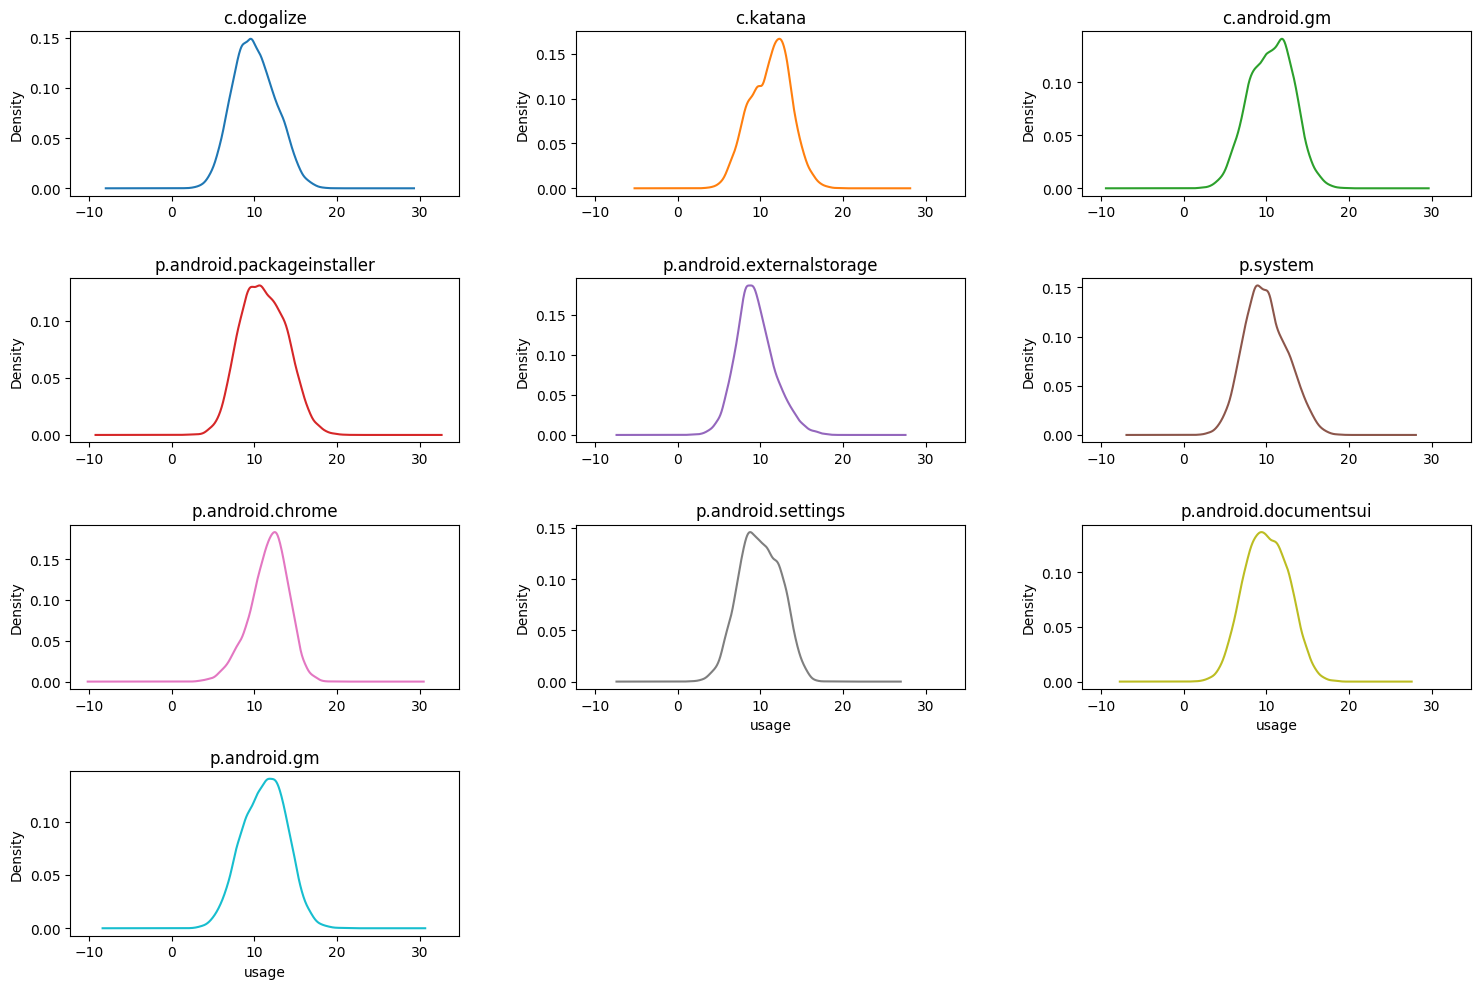

In [30]:
kde_plots = attributes.plot(kind='kde', subplots=True, layout=(4, 3), figsize=(15, 10), legend=False)
kde_plots = kde_plots.flatten()

titles =  attributes.columns

i=0
for i in range(0, 10):
    kde_plots[i].set_title(titles[i])
    kde_plots[i].set_xlabel("usage")

    kde_plots[i].tick_params(axis='x', which='both', labelbottom=True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

### Podľa jednotlivých grafov na pohľad vyplýva že atribúty patria do normálnej distribúcie.
### Aby naše tvrdenie bolo potvrdené, zobrazíme atribúty cez QQ plot.

### QQ ploty vybraných atribútov.

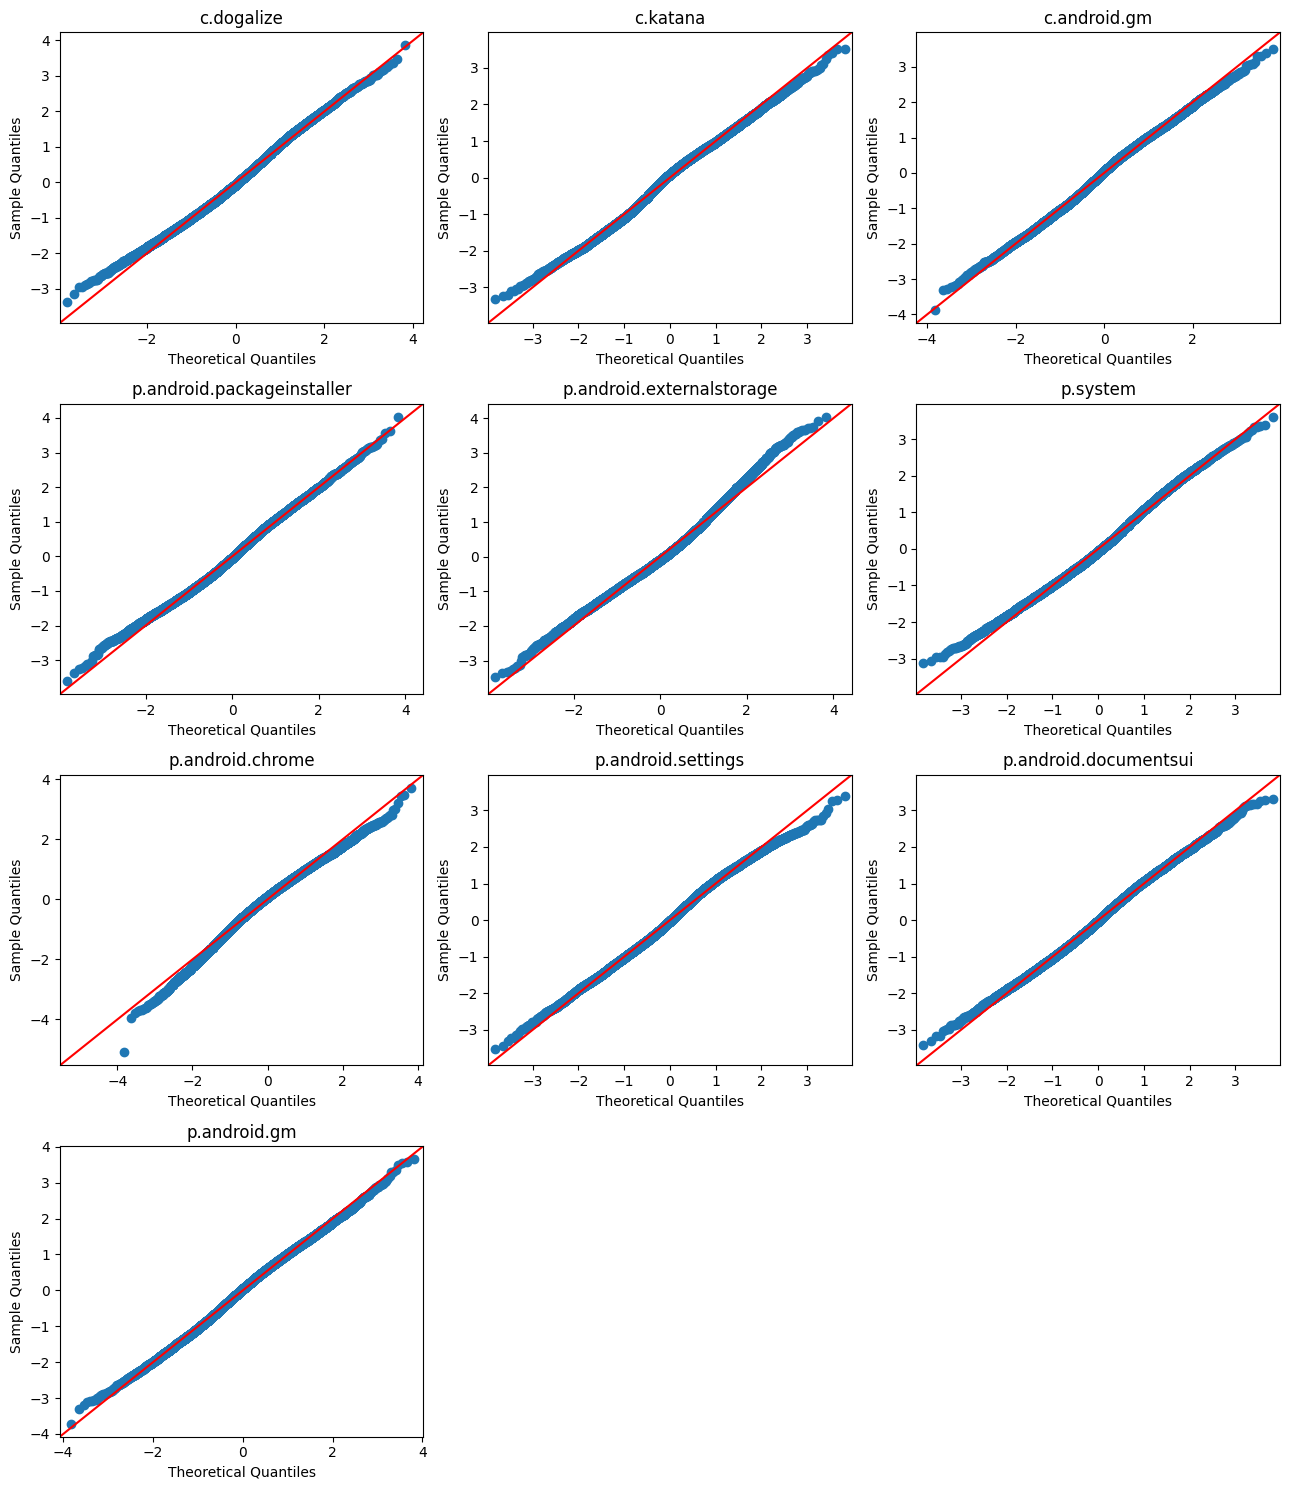

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(13, 15))

axes = axes.flatten()

for idx, col in enumerate(attributes.columns):
    sm.qqplot(attributes[col], fit=True, line="45", ax=axes[idx])
    axes[idx].set_title(col)

for i in range(len(attributes.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Atribúty podľa QQ plotov na pohľad takisto patria do normálnej distribúcie.
### Problém však vyvolávajú outlier-y, ktoré však neskôr odstránime.
### Vykonali ešte test na normálnu distribúciu, a to `Shapiro-Wilk` test na normalitu.

In [32]:
for i in attributes.columns:
    pvalue=stats.shapiro(attributes[i]).pvalue
    print(f"{i:<26} = {pvalue:.6f}")

c.dogalize                 = 0.000000
c.katana                   = 0.000000
c.android.gm               = 0.000000
p.android.packageinstaller = 0.000000
p.android.externalstorage  = 0.000000
p.system                   = 0.000000
p.android.chrome           = 0.000000
p.android.settings         = 0.000000
p.android.documentsui      = 0.000000
p.android.gm               = 0.000000


c:\Users\matus\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14983.
  res = hypotest_fun_out(*samples, **kwds)


### Na základe `Shapiro-Wilk` testu sa naše pôvodné tvrdenie, usúdené na základe grafov, vyvrátilo, pretože `p < 0.05` v každom prípade.
### Atribúty teda nepatria do normálnej distribúcie.
### Domnievame sa, že výskyt outlier-ov môže hrať v tomto rolu.

#
### Na základe upozornenia z predchádzajúceho testu na normalitu, sme zopakovali 100-krát rovnaký test, vždy s náhodnou vzorkou veľkosti 1000.

In [33]:
x = 100
y = 1000

print(f"{'P-values pre vzorky:':<31} {y//2} {y:>9} {y*2:>9}\n")

for i in attributes.columns:
    pvalue, pvalue1, pvalue2 = 0, 0, 0
    for j in range(x):
        sampled_data = attributes[i].sample(n=y//2, random_state=j)
        sampled_data1 = attributes[i].sample(n=y, random_state=j)
        sampled_data2 = attributes[i].sample(n=y*2, random_state=j)

        pvalue += stats.shapiro(sampled_data).pvalue
        pvalue1 += stats.shapiro(sampled_data1).pvalue
        pvalue2 += stats.shapiro(sampled_data2).pvalue
    
    pvalue /= x
    pvalue1 /= x
    pvalue2 /= x

    print(f"{i:<26} = {pvalue:.6f}  {pvalue1:.6f}  {pvalue2:.6f}")

P-values pre vzorky:            500      1000      2000

c.dogalize                 = 0.072306  0.011469  0.000037
c.katana                   = 0.038896  0.003447  0.000008
c.android.gm               = 0.133659  0.028522  0.000836
p.android.packageinstaller = 0.077382  0.010755  0.000183
p.android.externalstorage  = 0.005364  0.000186  0.000000
p.system                   = 0.041734  0.001458  0.000003
p.android.chrome           = 0.003495  0.000065  0.000000
p.android.settings         = 0.060847  0.005188  0.000068
p.android.documentsui      = 0.181345  0.081816  0.004272
p.android.gm               = 0.231547  0.093285  0.013085


### Z vykonaných testov vidíme, že čím zväčšujeme veľkosť vzorky, tým menej atribútov patrí do normálnej distribúcie.

#
## *C) Párová analýza dát*

### Rozhodli sme sa pre porovnanie jednotlivých atribútov prostredníctvom `Heat mapy`.

### Heat mapa pre Connections.

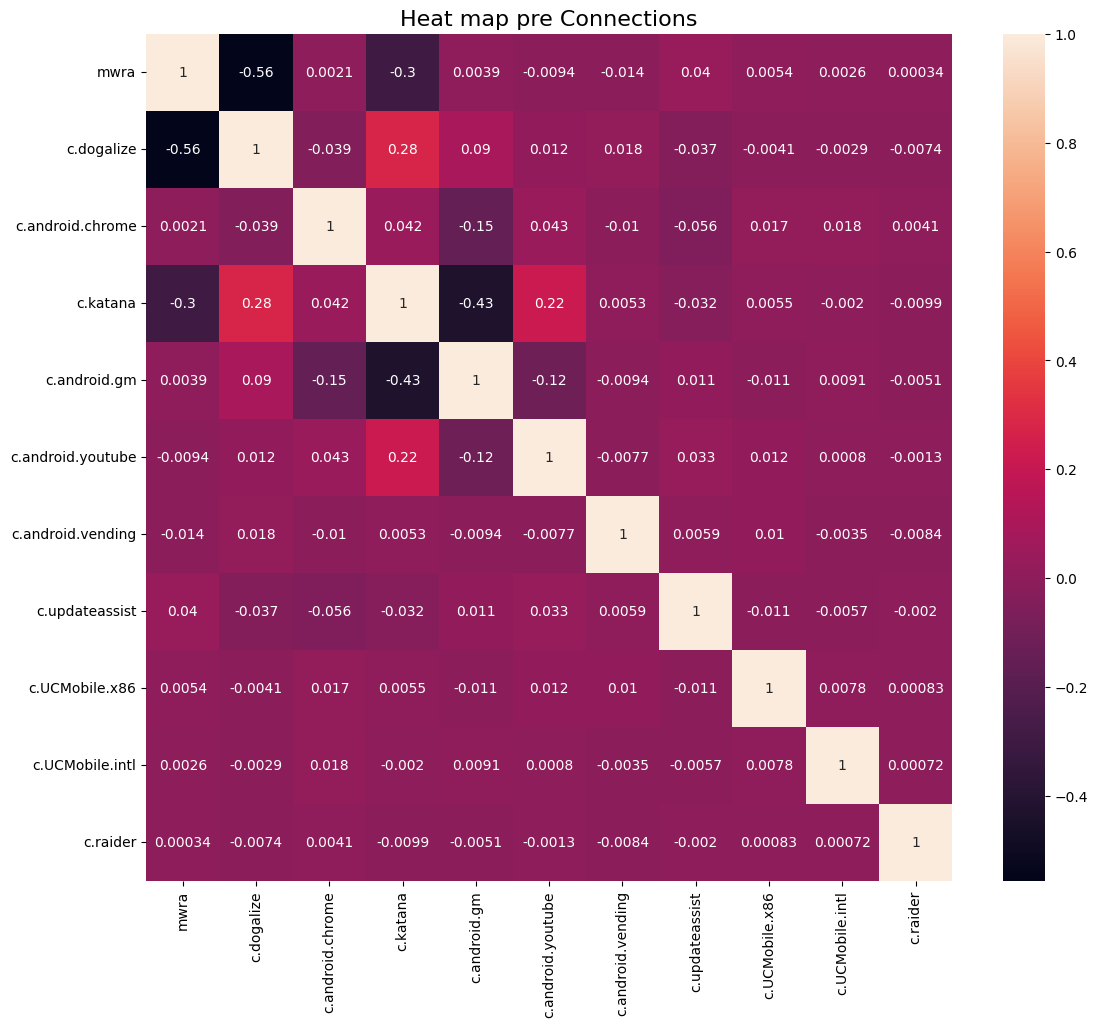

In [34]:
con2=con[[  'mwra', 
            'c.dogalize', 'c.android.chrome', 'c.katana',
            'c.android.gm', 'c.android.youtube', 'c.android.vending',
            'c.updateassist', 'c.UCMobile.x86', 'c.UCMobile.intl', 'c.raider']].copy()

con_corr2=con2.corr()

fig, ax = plt.subplots(figsize=(13,11))

ax.set_title('Heat map pre Connections', fontsize=16)

sns.heatmap(con_corr2, annot=True)
plt.show()

### Z vykreslenej `Heat mapy` vidíme, že existujú korelácie medzi viacerými atribútmi. Najvýraznejšie korelácie sú medzi:
- **`mwra`** a **`c.dogalize`** – korelačná hodnota: **-0.56**

- **`c.android.gm`** a **`c.katana`** – korelačná hodnota: **-0.43**

- **`mwra`** a **`c.katana`** – korelačná hodnota: **-0.30**

### Heat mapa pre Processes.

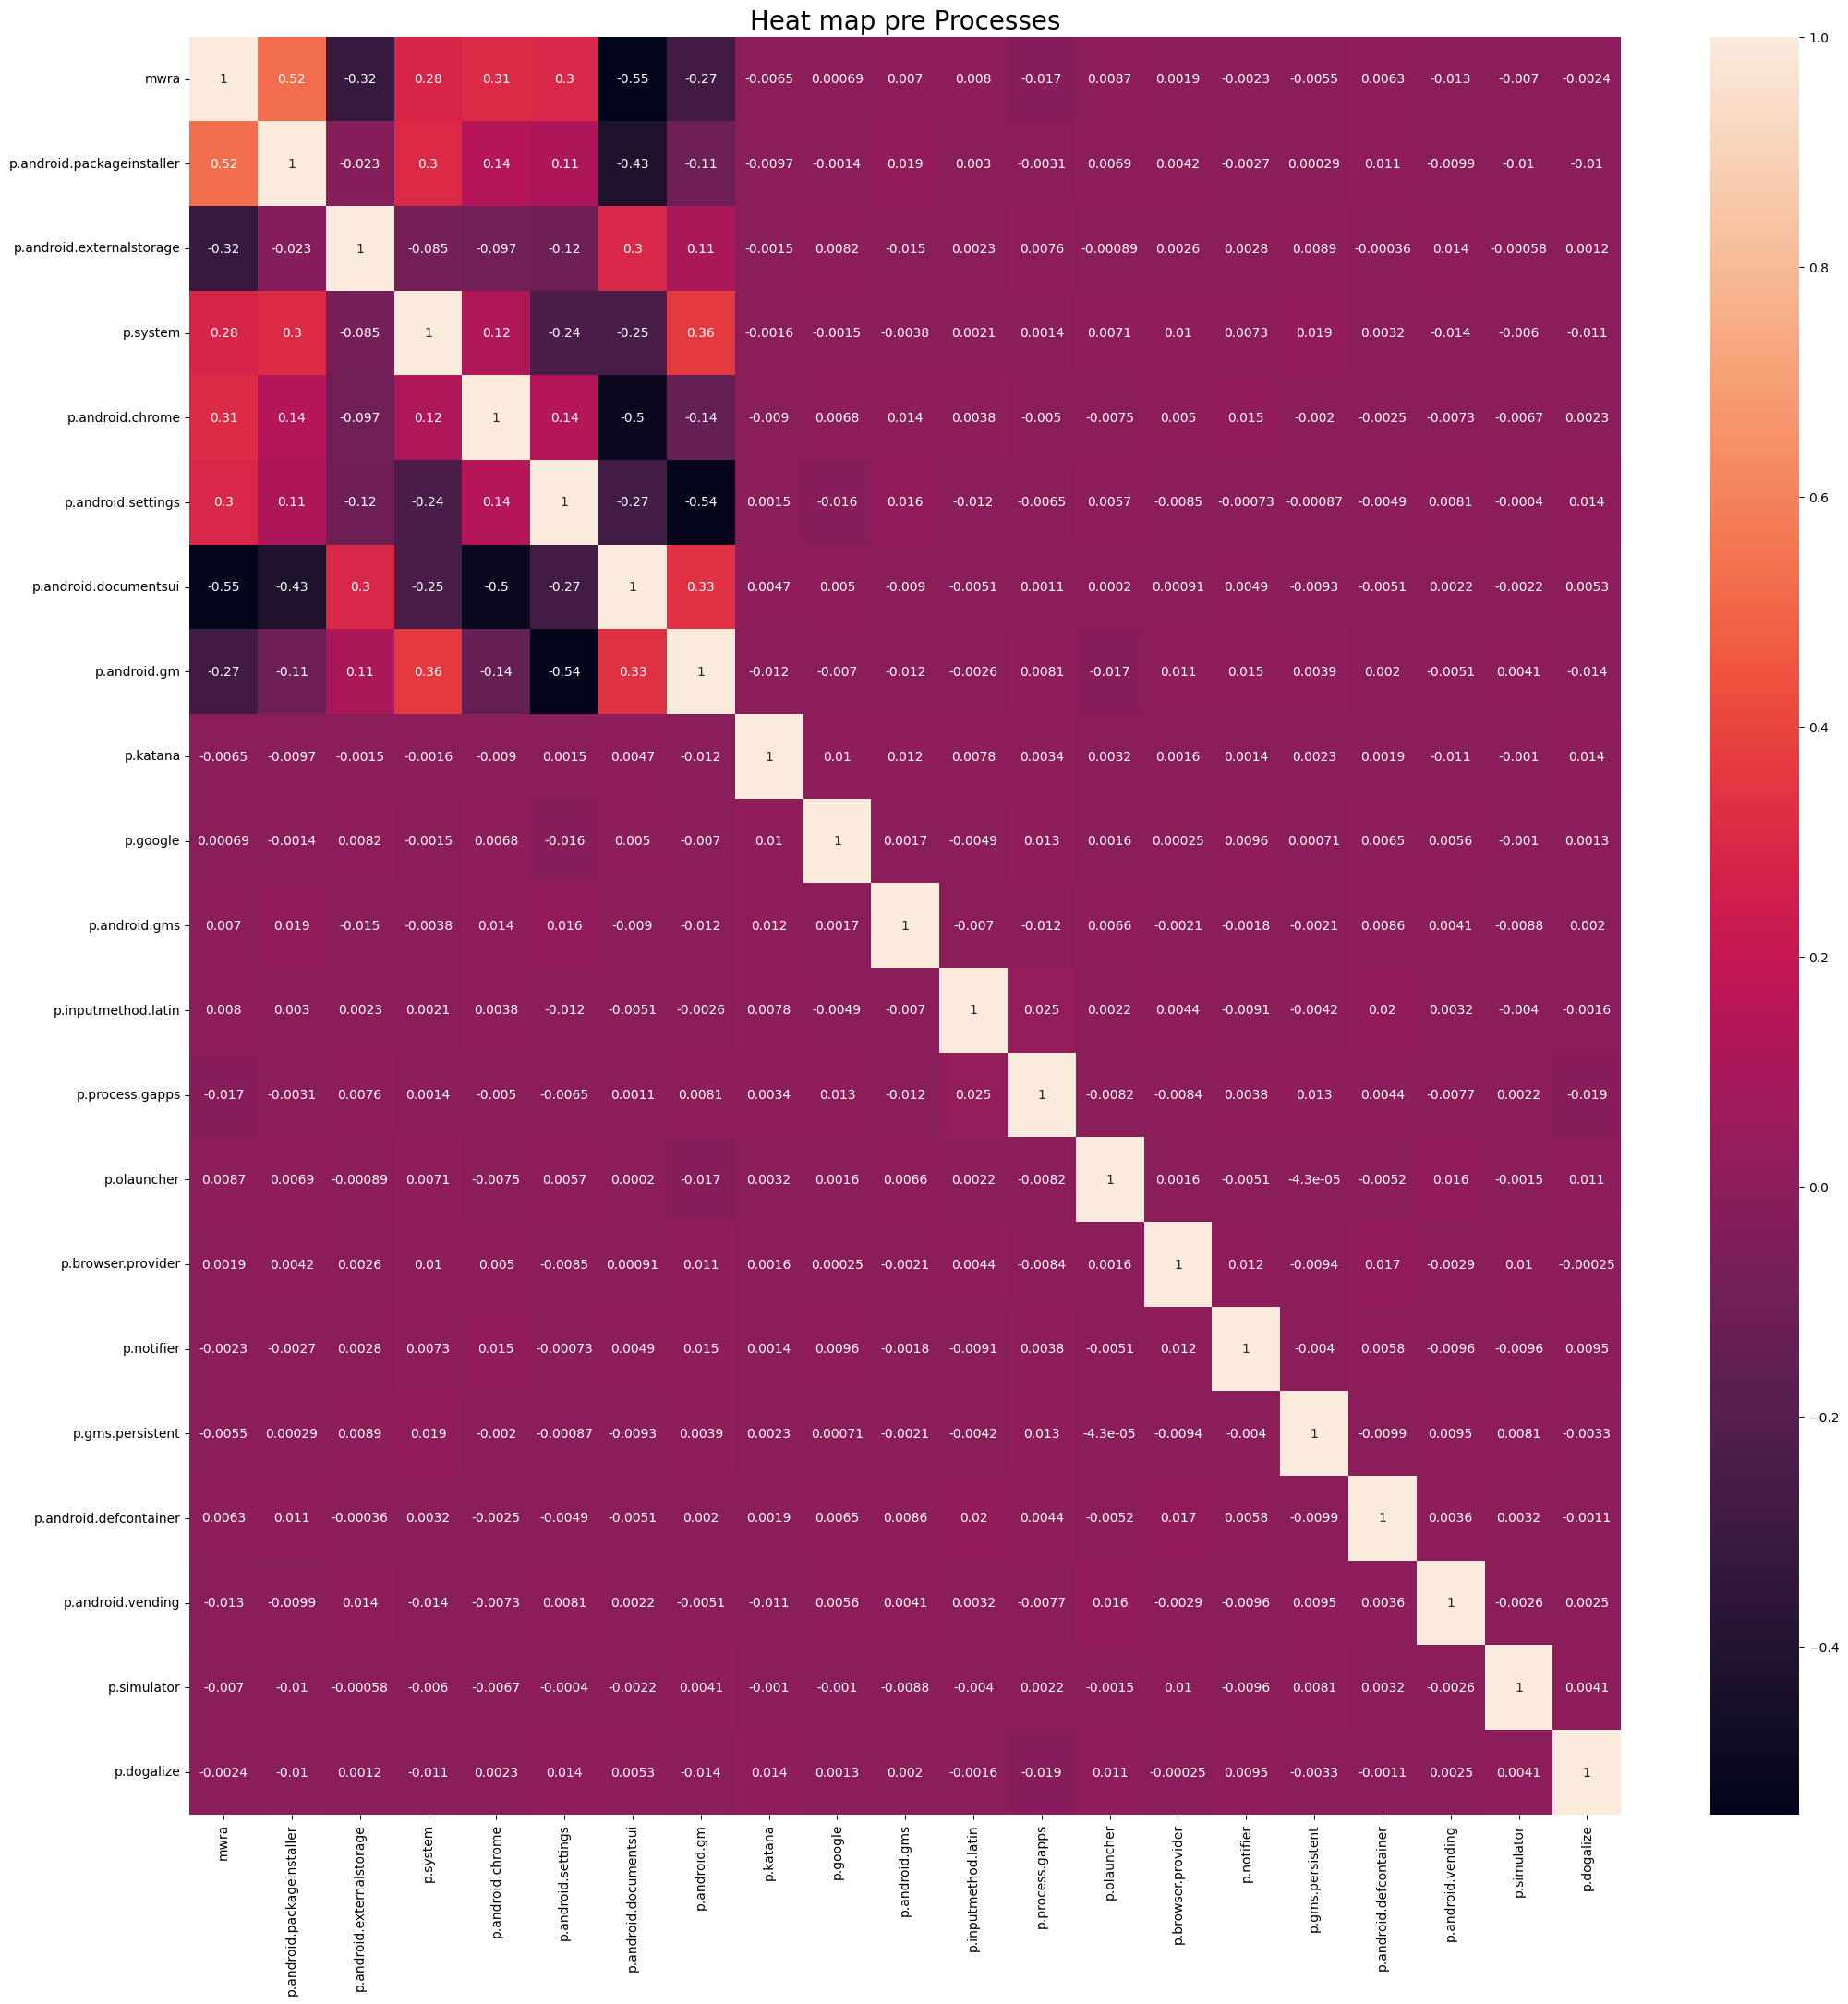

In [35]:
proc2 = proc[[  'mwra', 
                'p.android.packageinstaller',
                'p.android.externalstorage', 'p.system', 'p.android.chrome',
                'p.android.settings', 'p.android.documentsui', 'p.android.gm',
                'p.katana', 'p.google', 'p.android.gms', 'p.inputmethod.latin',
                'p.process.gapps', 'p.olauncher', 'p.browser.provider', 'p.notifier',
                'p.gms.persistent', 'p.android.defcontainer', 'p.android.vending',
                'p.simulator', 'p.dogalize']].copy()

proc_corr1=proc2.corr()

fig, ax = plt.subplots(figsize=(25,25))

ax.set_title('Heat map pre Processes', fontsize=20)

sns.heatmap(proc_corr1, annot=True)
plt.show()

### Z tejto Heat mapy vidíme viacero silnejších korelácií ako napr.
- **`mwra`** a **`c.p.android.documnetsui`** – korelačná hodnota: **-0.55**

- **`p.android.game`** a **`p.adroid.settings`** – korelačná hodnota: **-0.54**

- **`mwra`** a **`p.android.packageinstaller`** – korelačná hodnota: **-0.52**

### Pre porovnanie závislostí atribútov medzi `Connections` a `Processes` sme tieto DF spojili DF spojili na základe rovnosti: `ts`, `imei` a `mwra` atribútov.

In [36]:
con_proc = pd.merge(con, proc, on=['ts', 'imei', 'mwra'])
con_proc.columns

Index(['ts', 'imei', 'mwra', 'c.dogalize', 'c.android.chrome', 'c.katana',
       'c.android.gm', 'c.android.youtube', 'c.android.vending',
       'c.updateassist', 'c.UCMobile.x86', 'c.UCMobile.intl', 'c.raider',
       'p.android.packageinstaller', 'p.android.externalstorage', 'p.system',
       'p.android.chrome', 'p.android.settings', 'p.android.documentsui',
       'p.android.gm', 'p.katana', 'p.google', 'p.android.gms',
       'p.inputmethod.latin', 'p.process.gapps', 'p.olauncher',
       'p.browser.provider', 'p.notifier', 'p.gms.persistent',
       'p.android.defcontainer', 'p.android.vending', 'p.simulator',
       'p.dogalize'],
      dtype='object')

### `Heat mapa` pre merge DF: `Connections a Processes`.

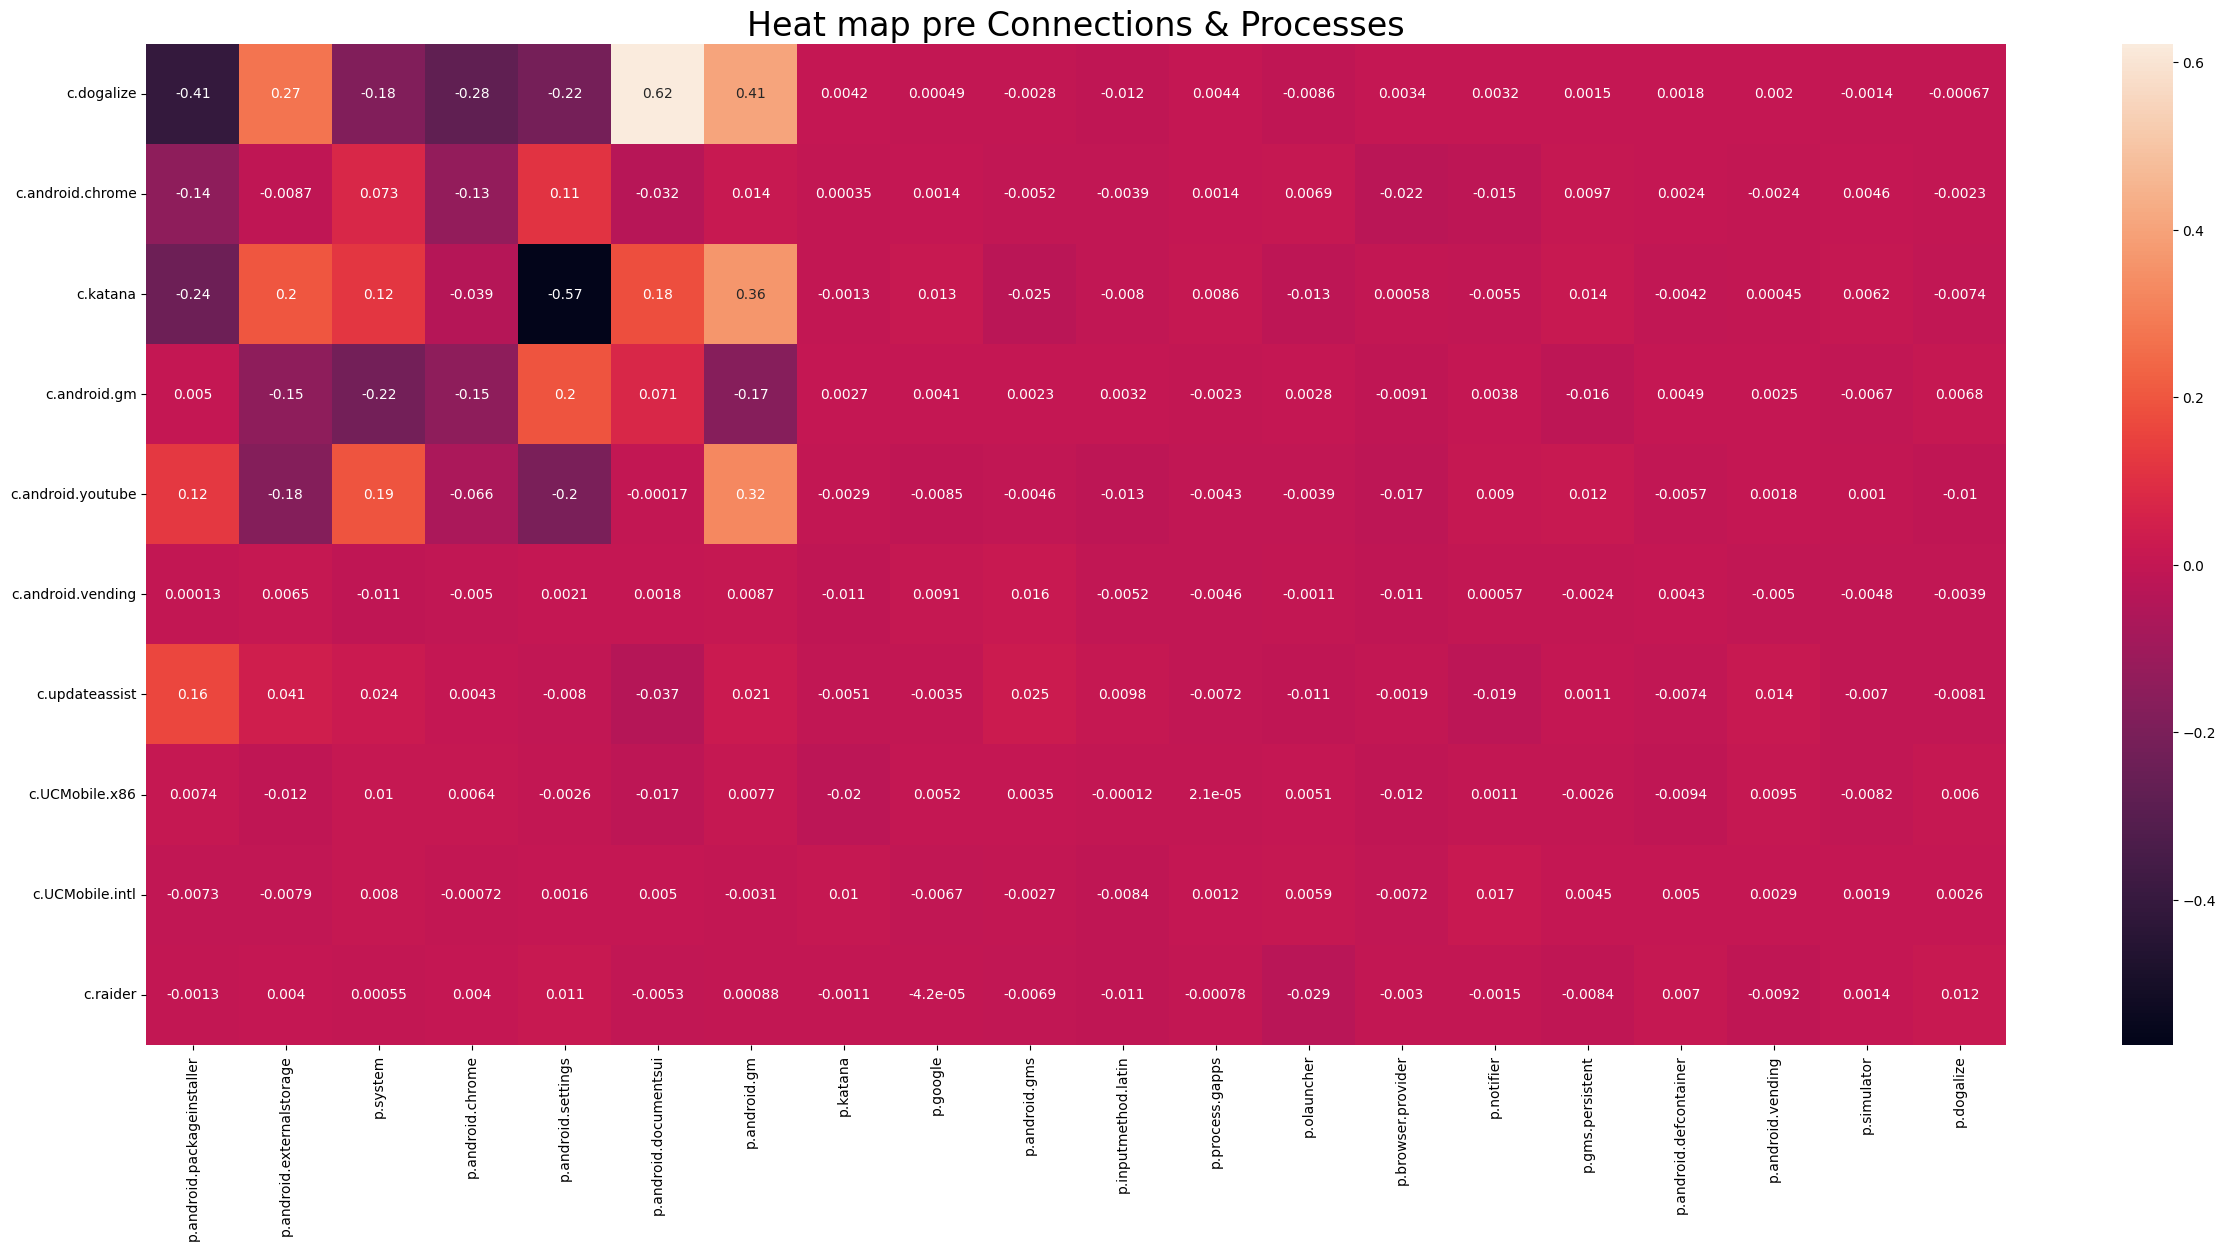

In [37]:
con_proc_corr=con_proc.drop(columns=['ts', 'imei']).corr()

fig, ax = plt.subplots(figsize=(30,13))

con_proc_corr_show=con_proc_corr.loc["c.dogalize":"c.raider", "p.android.packageinstaller":"p.dogalize"]

ax.set_title('Heat map pre Connections & Processes', fontsize=24)

sns.heatmap(con_proc_corr_show, annot=True)
plt.show()

### Na základe `Heat mapy` sme zistili značné korelácie medzi atribútmi:

- **`c.dogalize`** a **`p.android.documentsui`** – korelačná hodnota: **0.62**

- **`c.katana`** a **`p.android.settings`** – korelačná hodnota: **-0.57**

- **`c.dogalize`** a **`p.android.packageinstaller`** – korelačná hodnota: **-0.41**

## *D) Párová analýza dát - predikovaná premenná*

### Koreláciu atribútov s predikovanou premennou sme vykonali v predchádzajúcom kroku.

### Vyberieme korelácie predikovannej premennej s ostatnými atribútmi.

In [38]:
mwra_corr = con_proc_corr['mwra'].drop('mwra')

### Vybrané korelácie usporiadame podľa absolútnych hodnôt.

In [39]:
mwra_corr = con_proc_corr['mwra'].drop('mwra')
mwra_corr = pd.DataFrame({"values": mwra_corr, "absolute_values": mwra_corr.abs()})
mwra_corr.sort_values(by=["absolute_values"], inplace=True, ascending=False)
mwra_corr = mwra_corr["values"]

### Usporiadané korelácie zobrazíme na `Histograme`.

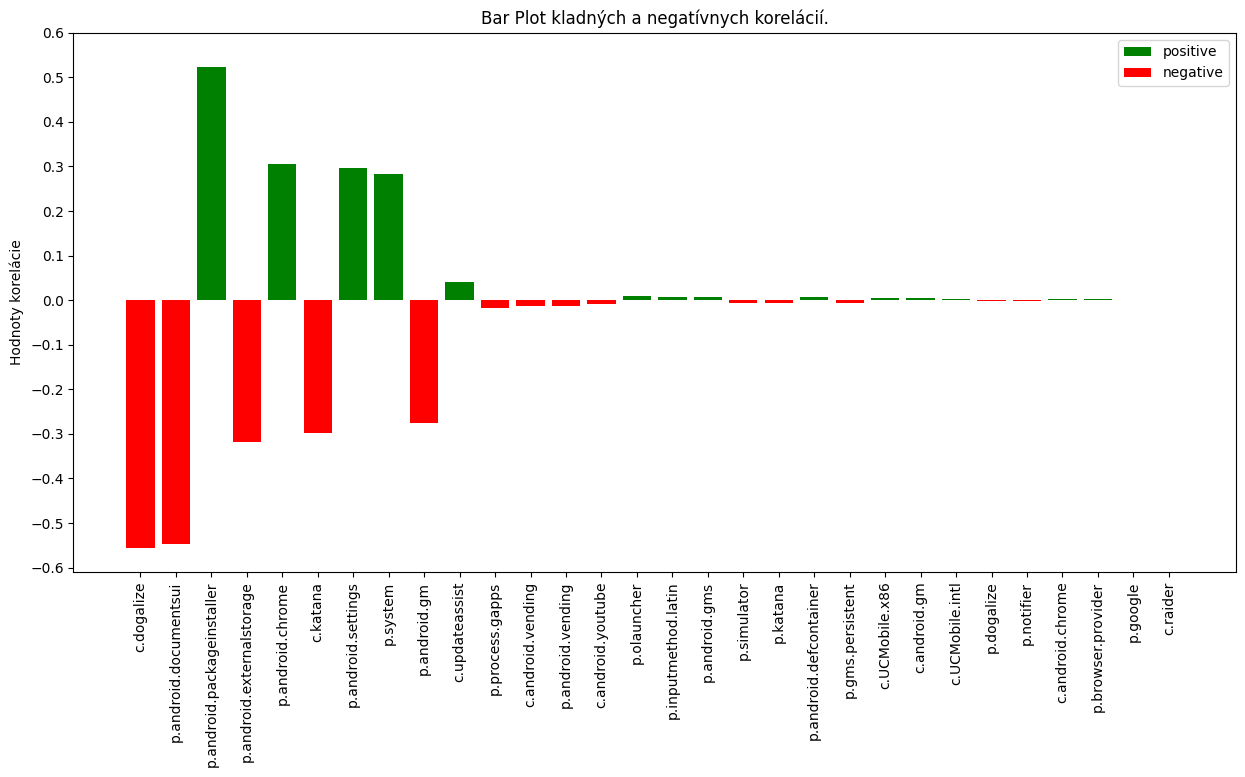

In [40]:
index = np.arange(len(mwra_corr))

plt.subplots(figsize=(15, 7))

plt.bar(index[mwra_corr >= 0], mwra_corr[mwra_corr >= 0], color="green", label="positive")
plt.bar(index[mwra_corr < 0], mwra_corr[mwra_corr < 0], color="red", label="negative")

plt.xticks(index, mwra_corr.index, rotation=90)
plt.yticks(np.arange(-0.6, 0.7, 0.1))
plt.title('Bar Plot kladných a negatívnych korelácií.')
plt.ylabel("Hodnoty korelácie")
plt.legend()
plt.show()

### Zobrazíme distribúciu atribútov pomocou `KDE` grafu, podľa predikovanej premennej.

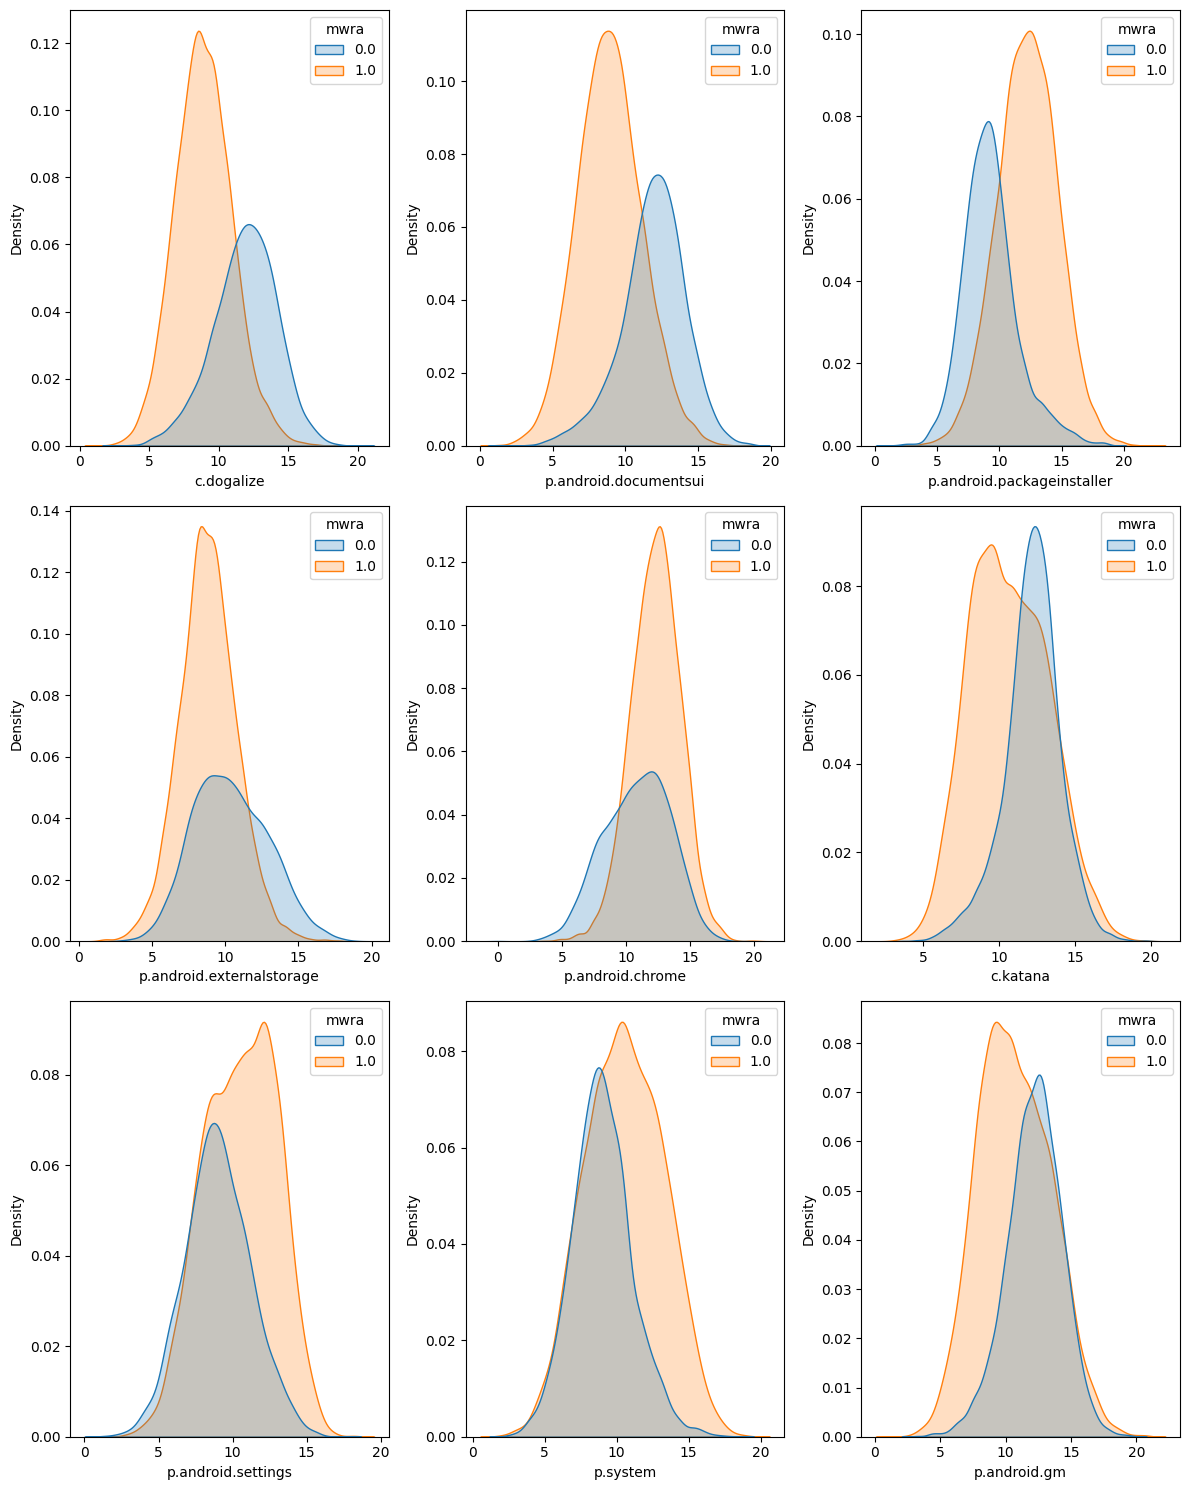

In [41]:
columns = mwra_corr.index[0:9]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 15))

axes = axes.flatten()

for idx, col in enumerate(columns):
    sns.kdeplot(x=con_proc[col], hue=con_proc['mwra'], fill=True, ax=axes[idx])

for i in range(len(attributes.columns), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

### Ak by sme boli schopní vertikálnou čiarou od seba oddeliť oba grafy, tak by bol atribút dokonalým predikátorom predikovanej premennej.

#
## *E) Dokumentujte Vaše prvotné zamyslenie k riešeniu zadania projektu.*

- ### Závislosť atribútov sme zobrazli pomocou `Heat mapy` v časti `1.1 C)` aj pre `Connections`, aj `Processes`. Takisto sme vypísali najsilnejšie korelácie medzi atribútmi.
- ### Závisloť predikovannej premennej sme zobrazili cez `Histogram` v časti `1.1 D)`.
- ### Kombinovanie záznamov bolo potrebné na zistenie korelácií atribútov z rôznych DF.
- ### Najsilnejšia korelácia je práve medzi atribútmi z rôznych DF.

#
# **1.2 Identifikácia problémov, integrácia a čistenie dát**

#
## *A) Nevhodná štruktúra dát, duplicitné záznamy, nejednotné formáty, chýbajúce, vychýlené hodnoty*

### Názvy atribútov jednotlivých DF.

#### Connections

In [42]:
con.columns

Index(['ts', 'imei', 'mwra', 'c.dogalize', 'c.android.chrome', 'c.katana',
       'c.android.gm', 'c.android.youtube', 'c.android.vending',
       'c.updateassist', 'c.UCMobile.x86', 'c.UCMobile.intl', 'c.raider'],
      dtype='object')

#### Processes

In [43]:
proc.columns

Index(['ts', 'imei', 'mwra', 'p.android.packageinstaller',
       'p.android.externalstorage', 'p.system', 'p.android.chrome',
       'p.android.settings', 'p.android.documentsui', 'p.android.gm',
       'p.katana', 'p.google', 'p.android.gms', 'p.inputmethod.latin',
       'p.process.gapps', 'p.olauncher', 'p.browser.provider', 'p.notifier',
       'p.gms.persistent', 'p.android.defcontainer', 'p.android.vending',
       'p.simulator', 'p.dogalize'],
      dtype='object')

#### Devices

In [44]:
dev.columns

Index(['latitude', 'longitude', 'store_name', 'code', 'location', 'imei'], dtype='object')

#### Profiles

In [45]:
prof.columns

Index(['job', 'current_location', 'imei', 'user_id', 'address', 'ssn',
       'company', 'birthdate', 'registration', 'mail', 'username', 'name'],
      dtype='object')

### Premenovanie stĺpcov. Osobná preferencia.

In [46]:
con = con.rename(columns={  'ts':'DateTime',
                            'imei':'ID',
                            'mwra':'Malware',
                            'c.dogalize':'Dogalize',
                            'c.android.chrome':'Chrome',
                            'c.katana':'Katana',
                            'c.android.gm':'Gm',
                            'c.android.youtube':'Youtube',
                            'c.android.vending':'Vending',
                            'c.updateassist':'Update_assist',
                            'c.UCMobile.x86':'UCMobile_x86',
                            'c.UCMobile.intl':'UCMobile_intl',
                            'c.raider':'Raider'})

proc = proc.rename(columns={'ts':'DateTime',
                            'imei':'ID',
                            'mwra':'Malware',
                            'p.android.packageinstaller':'Package_installer',
                            'p.android.externalstorage':'External_storage',
                            'p.system':'System',
                            'p.android.chrome':'Chrome',
                            'p.android.settings':'Settings',
                            'p.android.documentsui':'Document_sui',
                            'p.android.gm':'Gm',
                            'p.katana':'Katana',
                            'p.google':'Google',
                            'p.android.gms':'Gms',
                            'p.inputmethod.latin':'InputMethod_latin',
                            'p.process.gapps':'Process_gapps',
                            'p.olauncher':'OLauncher',
                            'p.browser.provider':'Browser_provider',
                            'p.notifier':'Notifier',
                            'p.gms.persistent':'Gms_persistent',
                            'p.android.defcontainer':'Def_container',
                            'p.android.vending':'Vending',
                            'p.simulator':'Simulator',
                            'p.dogalize':'Dogalize'})

dev = dev.rename(columns={  'latitude':'Latitude',
                            'longitude':'Longitude',
                            'store_name':'City',
                            'code':'Country',
                            'location':'Location',
                            'imei':'ID'})

prof = prof.rename(columns={'job':'Job',
                            'current_location':'Coordinates',
                            'imei':'ID',
                            'user_id':'UserID',
                            'address':'Adress',
                            'ssn':'SSN',
                            'company':'Company',
                            'birthdate':'Birthdate',
                            'registration':'Registration',
                            'mail':'Email',
                            'username':'Username',
                            'name':'Name'})

### Preusporiadanie stĺpcov. Osobná preferencia.

In [47]:
con = con[['ID', 'Malware', 'DateTime', 'Chrome', 'Youtube', 'Dogalize', 'Katana', 'Raider', 'Gm', 'Vending', 'Update_assist', 'UCMobile_x86', 'UCMobile_intl']]

proc = proc[['ID', 'Malware', 'DateTime', 'Chrome', 'Google', 'Dogalize', 'Katana', 'Gm', 'Vending', 'System', 'Settings', 'Simulator', 
             'Notifier', 'Gms', 'Gms_persistent', 'Document_sui', 'Package_installer', 'External_storage', 'InputMethod_latin', 'Process_gapps', 'OLauncher', 'Browser_provider', 'Def_container']]

dev = dev[['ID', 'Country', 'City', 'Location', 'Latitude', 'Longitude']]

prof = prof[['ID', 'UserID', 'Username', 'Name', 'Email', 'Birthdate', 'Job', 'Adress', 'SSN', 'Company', 'Registration', 'Coordinates']]

#
#### Funkcia pre `prof['Coordinates']` na oddelenie zemepisnej šírky a dĺžky.

In [48]:
def extract_coordinate(coordinate, which):
    if pd.isna(coordinate):
        return np.nan
    both = coordinate.split(', ')
    cleared = re.sub(r"[^\d.-]", "", both[which])
    return float(cleared)

### Rozdelenie `prof['Coordinates']` na atribúty `Latitude` a `Longitude`.

In [49]:
prof['Latitude'] = prof['Coordinates'].apply(extract_coordinate, args=(0,))
prof['Longitude'] = prof['Coordinates'].apply(extract_coordinate, args=(1,))

#### Atribút `Coordinates` už nie je potrebný v `Profiles`.

In [50]:
prof = prof.drop('Coordinates', axis=1)

#
### Zmena stĺpcov na správny/zodpovedajúci dátový formát.

#### Funkcia, konkrétne pre `prof['Registration']`, kvôli rôznym dátumovým formátom.

In [51]:
def convert_mixed_date(date_str):
    try:
        return pd.to_datetime(date_str)
    except:
        try:
            # (YYYY-MM-DD)
            return pd.to_datetime(date_str, format='%Y-%m-%d')
        except ValueError:
            try:
                # (MM/DD/YYYY, HH:MM:SS)
                return pd.to_datetime(date_str, format='%m/%d/%Y, %H:%M:%S')
            except ValueError:
                try:
                    # (07 Oct 2023)
                    return pd.to_datetime(date_str, format='%d %b %Y')
                except ValueError:
                    return pd.NaT

### Zmena najmä dátumov na formát `datetime`, ako aj zmena číselných atribútov na `int`, kde `float` je nepotrebný.

In [52]:
con['DateTime'] = pd.to_datetime(con['DateTime'])
con['Malware'] = con['Malware'].astype(int)

proc['DateTime'] = pd.to_datetime(proc['DateTime'])
proc['Malware'] = proc['Malware'].astype(int)

prof['Birthdate'] =  pd.to_datetime(prof['Birthdate'])
prof['Registration'] = prof['Registration'].apply(convert_mixed_date)

### Duplikátne záznamy v jednotlivých DF.

#### Connections

In [53]:
con.duplicated().sum()

0

#### Processes

In [54]:
proc.duplicated().sum()

0

#### Devices

In [55]:
dev.duplicated().sum()

6

#### Profiles

In [56]:
prof.duplicated().sum()

0

### Vymazanie duplikátnych záznamov.
#### Duplikáty v Connections a Processes sme odstránili v časti `1.1 B)`. `Profiles` duplikáty neobsahujú.

In [57]:
# con = con.loc[~con.duplicated()].reset_index(drop=True).copy()
# proc = proc.loc[~proc.duplicated()].reset_index(drop=True).copy()
dev = dev.loc[~dev.duplicated()].reset_index(drop=True).copy()

#### Pomocná funkcie na porovnanie vymazných záznamov.

In [58]:
def show_comparison(before, after):

    names = ['Connections', 'Processes', 'Devices', 'Profiles']

    print(f"{'Tabuľka':<12} {'Pred':>8} {'Po':>8} {'Vymazaných':>10}")
    print("="*42)

    for i in range(len(names)):
        pred = before[i]
        po = after[i]
        rozdiel = pred - po
        print(f"{names[i]:<12} {pred:>8} {po:>8} {rozdiel:>10}")

#### Uloženie počtu riadkov po vymazaní duplikátov.

In [59]:
after = count_of_rows()

### Porovnanie po vymazaní duplikátov.

In [60]:
show_comparison(before, after)

Tabuľka          Pred       Po Vymazaných
Connections     15163    14983        180
Processes       15163    14983        180
Devices          2983     2977          6
Profiles         2517     2517          0


#
## *B) Chýbajúce hodnoty*

### Chýbajúcich hodnoty v jednotlivých DF.

#### Connections

In [61]:
con.isna().sum()

ID               0
Malware          0
DateTime         0
Chrome           0
Youtube          0
Dogalize         0
Katana           0
Raider           0
Gm               0
Vending          0
Update_assist    0
UCMobile_x86     0
UCMobile_intl    0
dtype: int64

#### Processes

In [62]:
proc.isna().sum()

ID                   0
Malware              0
DateTime             0
Chrome               0
Google               0
Dogalize             0
Katana               0
Gm                   0
Vending              0
System               0
Settings             0
Simulator            0
Notifier             0
Gms                  0
Gms_persistent       0
Document_sui         0
Package_installer    0
External_storage     0
InputMethod_latin    0
Process_gapps        0
OLauncher            0
Browser_provider     0
Def_container        0
dtype: int64

#### Devices

In [63]:
dev.isna().sum()

ID           0
Country      1
City         0
Location     0
Latitude     0
Longitude    0
dtype: int64

#### Profiles

In [64]:
prof.isna().sum()

ID                 0
UserID             0
Username           0
Name               0
Email              0
Birthdate       1133
Job             1762
Adress           378
SSN                0
Company            0
Registration       0
Latitude         126
Longitude        126
dtype: int64

#
### Lokalizovanie chýbajúcej hodnoty v `dev['Country']`.

In [65]:
dev.loc[dev['Country'].isna()]

,ID,Country,City,Location,Latitude,Longitude
2525,8630330696303481479,NaN,Okahandja,Africa/Windhoek,-21.98333,16.91667


### Nahradenie chýbajúcej hodnoty v `dev['Country']`. Mesto `Okahandja` sa nachádza v Namíbií = `NA`.

In [66]:
dev.loc[2525, 'Country'] = 'NA'

#### Overenie zmeny.

In [67]:
dev.loc[dev['Country'] == 'NA']

,ID,Country,City,Location,Latitude,Longitude
2525,8630330696303481479,NA,Okahandja,Africa/Windhoek,-21.98333,16.91667


#
### Atribút `prof['Job']` obsahuje `1762` chýbajúcich hodnôt čo je viac ako polovica z celkového počtu (`2517`) v `Profiles`.
#### Nahradiť chýbajúce hodnoty napr. cez modus alebo zadaním defaultnej hodnoty by pri ďalšej analýze neposkytlo nič relevantné podľa nás.
#### Takisto nevidíme dôvod ponechať tento atribút pre ďalšiu analýzu. Preto sme sa rozhodli atribút odstrániť.

### Odstránenie atribútu `Job` z Profiles.

In [68]:
prof = prof.drop('Job', axis=1)

#
### Atribút `prof['Birtdate']` obsahuje `1133` chýbajúcich hodnôt, takmer polovica (`2517`).
#### Z rovnakých dôvodov ako pri atribúte `Birthdate` sme sa rozhodli atribút odstrániť.

### Odstránenie atribútu `Birthdate` z Profiles.

In [69]:
prof = prof.drop('Birthdate', axis=1)

#
### Atribút `prof['Adress']` obsahuje `378` chýbajúcich hodnôt, čo je približne `15%`.
### Chýbajúce hodnoty pre tento atribút sme sa rozhodli nahradiť defaultnou hodnotou `'not included'`.

### Zmena chýbajúcich hodnôt na `'not included'`.

In [70]:
prof['Adress'] = prof['Adress'].fillna('not included')

#
### Atribúty `prof['Latitude']` a `prof['Longitude']` obsahujú `126` chýbajúcich hodnôt (dvojíc), čo je približne `5%`.
### Po detailnejšom skúmaní a zisťovaní skutočnej polohy koordinácií, sme zistili, že veľké percento ukazuje na náhodné miesta v oceánoch po celom svete a na miesta, ktoré jednoducho nedávajú zmysel pre človeka.
### Z toho dôvodu sme sa rozhodli zbaviť týchto atribútov.

### Zobrazenie súradníc je vykreslené na grafe spolu s **relatívnym** vyzobrazením kontinentov (Európa a Ázia sú osobitne).

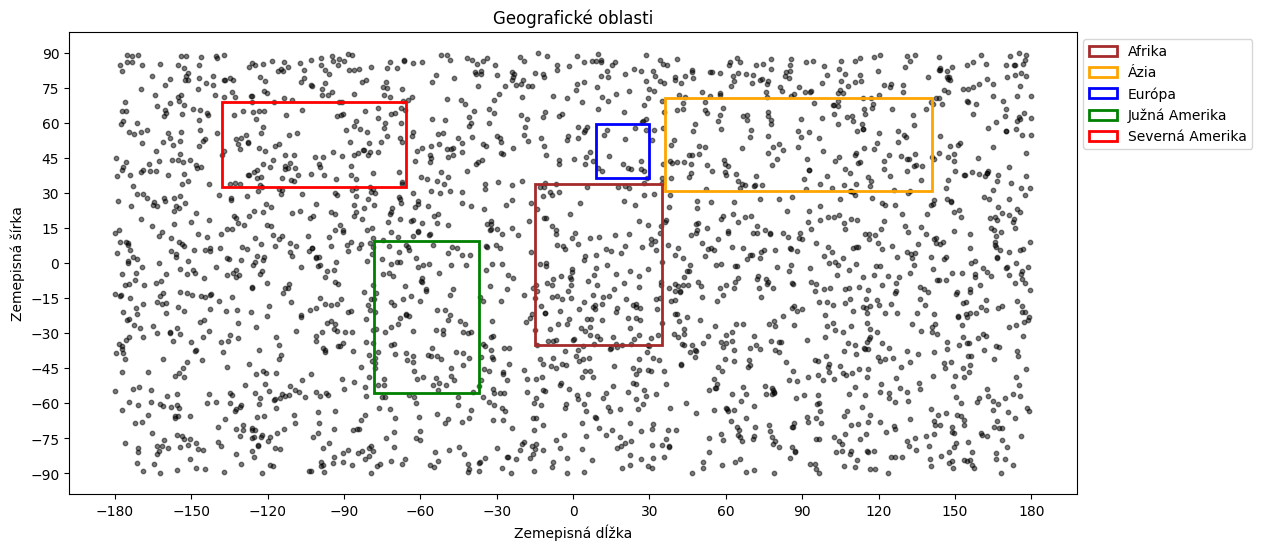

In [71]:
plt.figure(figsize=(13, 6))
plt.scatter(prof['Longitude'], prof['Latitude'], color='black', s=10, alpha=0.5)

asia = plt.Rectangle((36, 31), 105, 40, linewidth=2, edgecolor='orange', facecolor='none', label='Ázia')
africa = plt.Rectangle((-15, -35), 50, 69, linewidth=2, edgecolor='brown', facecolor='none', label='Afrika')
europe = plt.Rectangle((9, 36.5), 21, 23, linewidth=2, edgecolor='blue', facecolor='none', label='Európa')
south_america = plt.Rectangle((-78, -55.5), 40.9, 65, linewidth=2, edgecolor='green', facecolor='none', label='Južná Amerika')
north_america = plt.Rectangle((-138, 32.7), 72.4, 36.5, linewidth=2, edgecolor='red', facecolor='none', label='Severná Amerika')

plt.gca().add_patch(africa)
plt.gca().add_patch(asia)
plt.gca().add_patch(europe)
plt.gca().add_patch(south_america)
plt.gca().add_patch(north_america)

plt.xticks(np.arange(-180, 181, 30))
plt.yticks(np.arange(-90, 91, 15))

plt.xlabel('Zemepisná dĺžka')
plt.ylabel('Zemepisná šírka')
plt.title('Geografické oblasti')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Z grafu je očividné, že takmer každý kút sveta je zastúpený.

#
### Odstránenie atribútútov `Latitude` a `Longitude` z Profiles.

In [72]:
prof = prof.drop(['Latitude', 'Longitude'], axis=1)

#
## *C) Vychýlené hodnoty*

#### Funkcia na vykreslenie box-plotov pre ukážku outlier-ov.

In [73]:
def show_box_plots(df, cols, columns):
    rows = (len(columns) + cols - 1) // cols

    plt.figure(figsize=(5 * cols, 5 * rows))

    for i, col in enumerate(columns):
        plt.subplot(rows, cols, i + 1)
        try:
            df[col].plot(kind='box')
            plt.title(f'{col}')
        except Exception as e:
            print(f"Chyba pri vykresľovaní boxplotu pre {col}: {e}")
        plt.ylabel('Hodnoty')

    plt.tight_layout()
    plt.show()

### Box-ploty pre `Connections`.

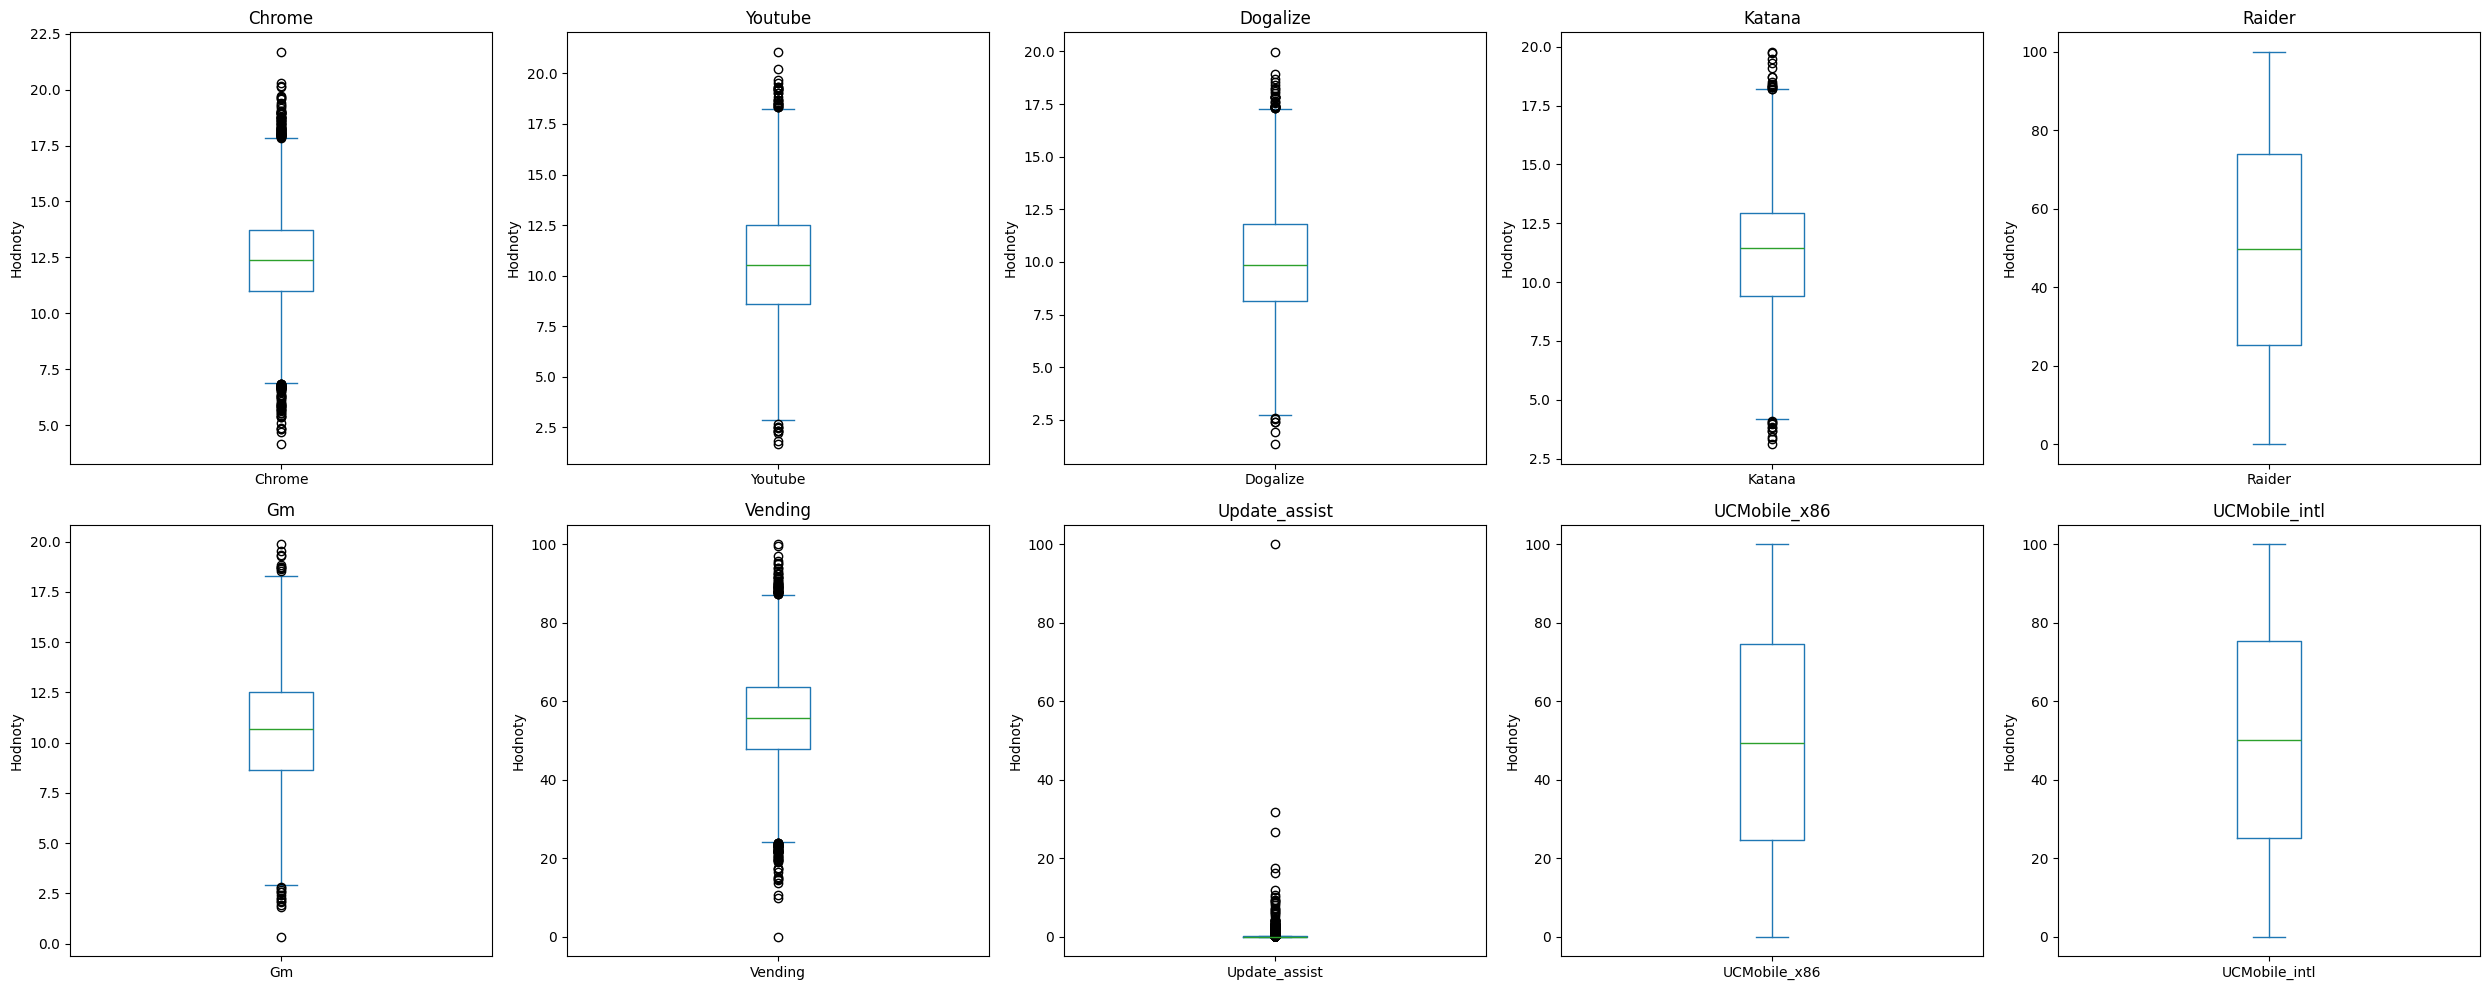

In [74]:
show_box_plots(con, 5, con.columns[3:])

#### Z grafov môžeme vidieť, že atribúty `Raider`, `UCMobile_x86`, `UCMobile_intl` nemajú žiadne viditeľné outlier-y.
#### Na druhej strane môžeme vidieť zaujímavé hodnoty pri atribúte `Update_assist`. Tomuto atribútu sa viac budeme venovať neskôr.

#
### Box-ploty pre `Processes`.

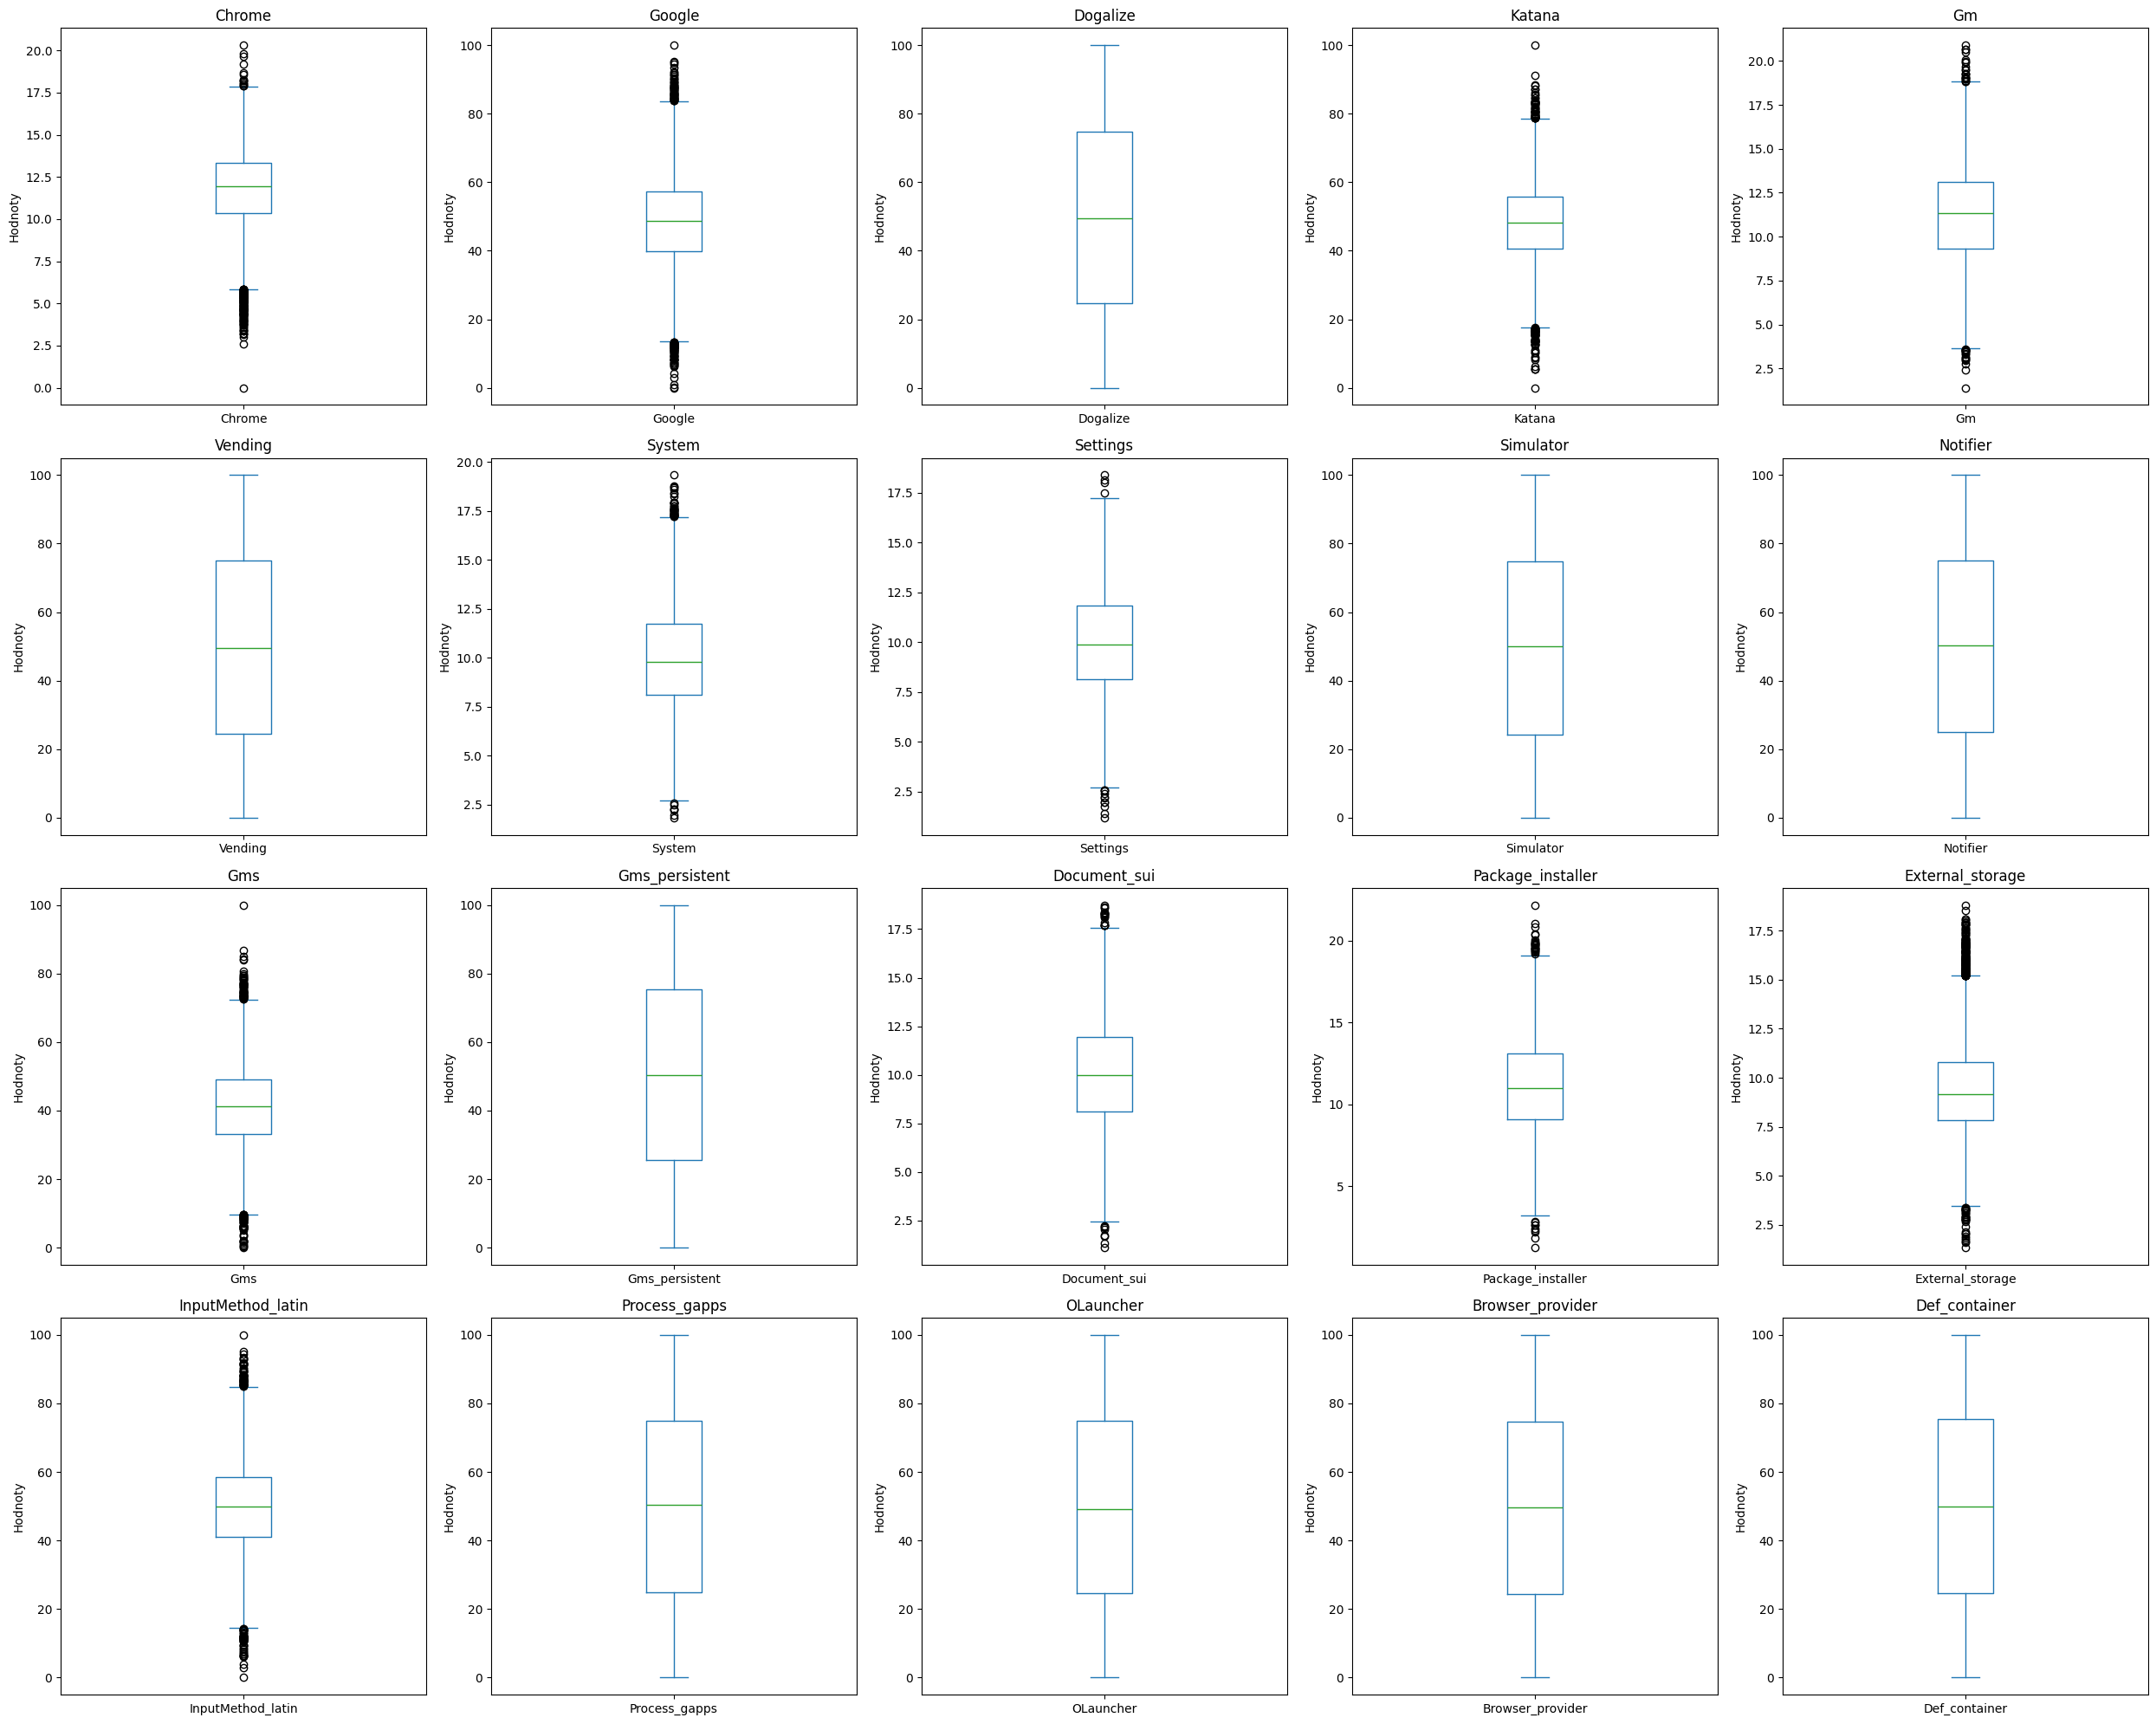

In [75]:
show_box_plots(proc, 5, proc.columns[3:])

#### Vyzobrazením grafov pre `Processes` vidíme že až takmer polovica atribútov (9/20) nemá viditeľné outlier-y.
#### Na všetky atribúty a ich konkrétny počet ako aj percentuálne vyjadrenie outlier-ov sa pozrieme nižšie.

#
#### Funkcia identifikovania outlier-ov.

In [76]:
def identify_outliers(column, col_name):
    lower = column.quantile(0.25) - 1.5 * stats.iqr(column)
    upper = column.quantile(0.75) + 1.5 * stats.iqr(column)

    outliers = column[(column > upper) | (column < lower)]
    
    if not outliers.empty:
        return (col_name, outliers.count())
    else:
        return (col_name, 0)

#### Funkcia na vypísanie a vrátenie outlier-ov.

In [77]:
def count_outliers_and_print(df, dataframe_name):
    column_names = df.columns[3:]
    df_count = df.shape[0]

    values = []
    
    for col in column_names:
        values.append(identify_outliers(df[col], col))
    
    sorted_outliers = sorted(values, key=lambda x: x[1], reverse=True)
    
    print(f"Počet outlierov (% aj počet) pre {dataframe_name} ({df_count}):\n")
    for col, count in sorted_outliers:
        percentage = round((count / df_count) * 100, 1)
        print(f'{col:>18}  {percentage:<4}  {count:<6}')
    
    return values

#
### Outlier-y pre `Connections`.

In [78]:
con_outliers = count_outliers_and_print(con, "Connections")

Počet outlierov (% aj počet) pre Connections (14983):

     Update_assist  15.9  2379  
            Chrome  0.9   134   
           Vending  0.7   109   
           Youtube  0.2   37    
          Dogalize  0.2   35    
            Katana  0.2   27    
                Gm  0.2   23    
            Raider  0.0   0     
      UCMobile_x86  0.0   0     
     UCMobile_intl  0.0   0     


#### Z vypočítaných hodnôt vidíme, že atribúty DF `Connections`, až na jeden atribút, neobsahujú veľa outlier-ov.
#### Problémový atribút je `Update_assist` s počtom outlier-ov až `15.9%` - `2379` záznamov.
#### Rozhodli sme sa, že okrem atribútu `Update_assist`, všetkým atribútom outlier-y zmeníme na hraničné hodnoty.
#### Na atribút `Update_assist` sa pozrieme ešte bližšie neskôr.

#
### Outlier-y pre `Processes`.

In [79]:
proc_outliers = count_outliers_and_print(proc, "Processes")

Počet outlierov (% aj počet) pre Processes (14983):

  External_storage  1.7   249   
            Chrome  1.2   176   
 InputMethod_latin  0.8   117   
            Google  0.8   113   
               Gms  0.7   110   
            Katana  0.7   100   
            System  0.3   43    
                Gm  0.3   39    
 Package_installer  0.2   31    
      Document_sui  0.2   25    
          Settings  0.1   15    
          Dogalize  0.0   0     
           Vending  0.0   0     
         Simulator  0.0   0     
          Notifier  0.0   0     
    Gms_persistent  0.0   0     
     Process_gapps  0.0   0     
         OLauncher  0.0   0     
  Browser_provider  0.0   0     
     Def_container  0.0   0     


#### Zo zistených hodnôt vidíme, že `Processes` nemá s outlier-mi veľký problém.
#### Najviac outlier-ov má atribút `External_storage` - `1.7%` - `249` záznamov.
#### Rozhodli sme sa, že každému atribútu, s `počtom outlier-ov > 0`, hodnoty outlier-ov zmeníme na hraničnú hodnotu.  

#
#### Funkcia na zmenu outlier-ov na hraničné hodnoty.

In [80]:
def correct_outliers_by_column(df, df_package, exceptions):
    for data in df_package:
        col_name = data[0]
        count = data[1]

        if col_name in exceptions: continue
    
        if count > 0:
            lower = df[col_name].quantile(0.25) - 1.5 * stats.iqr(df[col_name])
            upper = df[col_name].quantile(0.75) + 1.5 * stats.iqr(df[col_name])

            df[col_name] = df[col_name].apply(
                lambda x: lower if x < lower else upper if x > upper else x
            )
    
    return df

#
### Zmena hodnôt outlier-ov na hraničné hodnoty pre `Connections`, okrem atribútu `Update_assist`.

In [81]:
con = correct_outliers_by_column(con, con_outliers, ["Update_assist"])

#
### Zmena hodnôt outlier-ov na hraničné hodnoty pre `Processes`.

In [82]:
proc = correct_outliers_by_column(proc, proc_outliers, [])

#
### Bližší pohľad na `Connections['Update_assist']`.

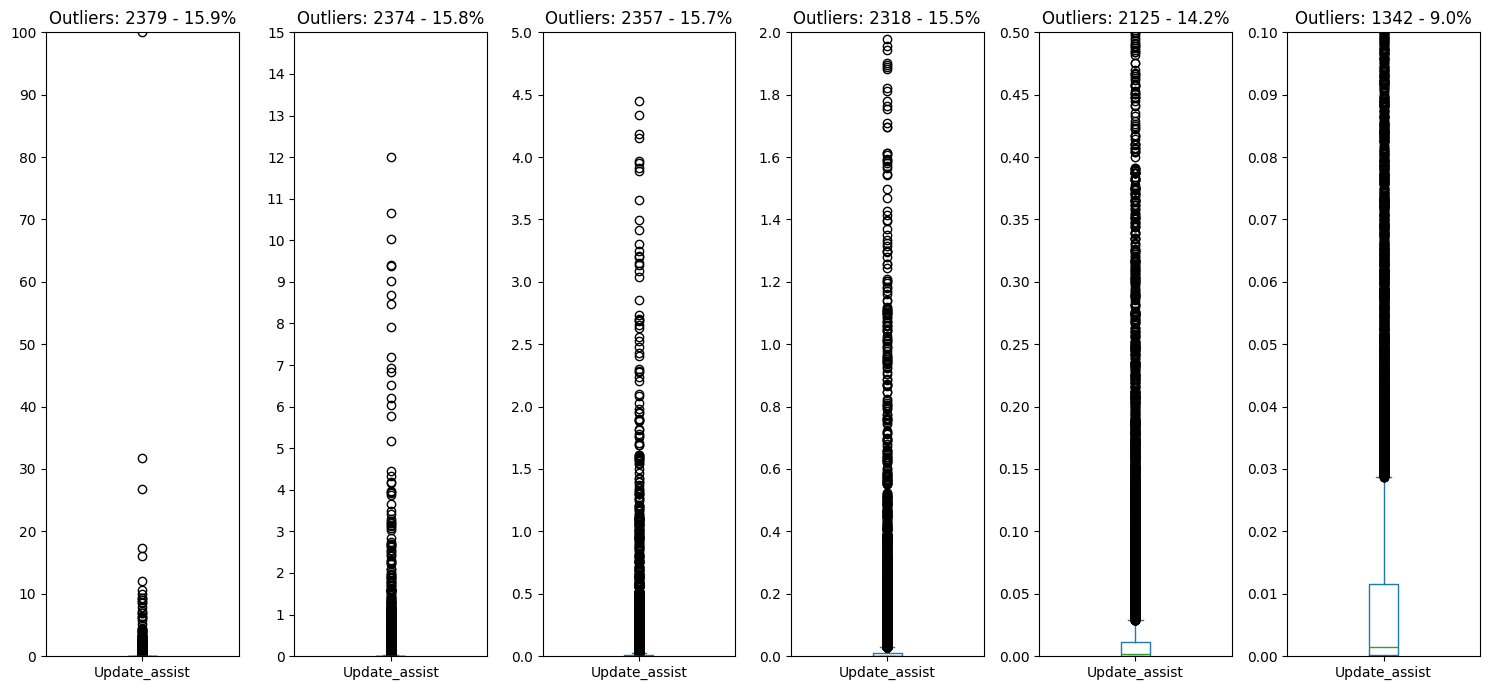

In [83]:
y_limits = [
    (0, 100, 10),
    (0, 15, 1),
    (0, 5, 0.5),
    (0, 2, 0.2),
    (0, 0.5, 0.05),
    (0, 0.1, 0.01)
]

upper_border = con['Update_assist'].quantile(0.75) + 1.5 * stats.iqr(con['Update_assist'])

plt.figure(figsize=(15, 7))

for i, (y_min, y_max, step) in enumerate(y_limits):
    plt.subplot(1, 6, i + 1)
    
    con['Update_assist'].plot(kind='box')
    
    plt.ylim(y_min, y_max)
    plt.yticks(np.arange(y_min, y_max + step, step))

    outliers_count = con[(con['Update_assist'] > upper_border) & (con['Update_assist'] <= y_max)].shape[0]
    
    plt.title(f'Outliers: {outliers_count} - {round((outliers_count/con['Update_assist'].shape[0]) * 100, 1)}%')

plt.tight_layout()
plt.show()

### Môžeme vidieť ktoré hodnoty a aké rozmedzie outlier-y obsadzujú.
### Po dlhšom rozhodovaní sme sa rozhodli, že odstánime outlier-y s hodnotou nad `5`.
### Domnievame sa, že veľké množstvo outlier-ov pri tomto atribúte môže predstavovať niečo viac.
### Konkrétne môže ísť o extrémne hodnoty, ktoré boli zaznamenané, ale nie sú chybné vzhľadom na počet.
### Ako sme z grafov mohli vidieť tak väčšina hodnôt `con['Update_assist']` je koncentrovaná okolo hodnoty `0.01`.
### V porovnaní, hodnota, kde začínajú outliery je `0.03` a tiahne sa až k hodnote `1.2` (4. graf zľava)
### Odstrániť všetky outlier-y sme neuznali za vhodné ako aj nahradiť celú respektíve určitú časť na hraničnú hodnotu.
### Veríme, že ponechať hodnoty s menšou úpravou, bude najlepšie.

#
### Odtránenie záznamov, kde `con['Update_assist'] >= 5`.

In [84]:
con = con[con['Update_assist'] < 5].copy()

#
# **1.3 Formulácia a štatistické overenie hypotéz o dátach**

#
## *A) Sformulujte dve hypotézy o dátach v kontexte zadanej predikčnej úlohy.*

### `Hypotéza 1`:

#### `H0`: `con['Youtube']` má v priemere nižšiu váhu ako `con['Dogalize']` v malware-related-activity stave.
#### `HA`: `con['Youtube']` má váhu vyššiu alebo `con['Dogalize']` má váhu nižšiu v malware-related-activity stave voči oponentovi.

#
### Počet záznamov v `Connections`, kde `mwra=1`.

In [85]:
con.query('Malware == 1').shape[0]

9366

### Zistíme priemernú hodnotu pre `con['Youtube']` ak `mwra=1`.

In [86]:
ytb_mean = con[con['Malware'] == 1]['Youtube'].mean(); print(ytb_mean)

10.553175841341021


### Zistíme priemernú hodnotu pre `con['Dogalize']` ak `mwra=1`.

In [87]:
dogalize_mean = con[con['Malware'] == 1]['Dogalize'].mean(); print(dogalize_mean)

8.918405222346784


### Z vypočítaných hodnôt vidíme, že priemerná hodnota `Youtube` > `Dogalize`

In [88]:
print(abs(ytb_mean - dogalize_mean))

1.6347706189942368


### Z hodnôt vyššie `H0` zamietame a prijímame `HA`.

#
### `Hypotéza 2`:

#### `H0`: Najsilnejšie korelácie atribútov z `Conenctions` a `Processes` s predikovanou premennou sa nezmenili o viac ako `2%`. 
#### `HA`: Najsilnejšie korelácie atribútov z `Conenctions` a `Processes` s predikovanou premennou sa zvýšili alebo znížili o viac ako `2%`.

#
### Vypočítame vzájomné korelácie atribútov z `Conenctions` a `Processes`.

In [89]:
con_proc_new = pd.merge(con, proc, on=['DateTime', 'ID', 'Malware'], suffixes=('_Con', '_Proc'))

con_proc_corr_new=con_proc_new.drop(columns=['DateTime', 'ID']).corr()

### Vyberieme len korelácie s predikovanou premennou a graficky ich zobrazíme zoradené podľa absolútnej hodnoty.

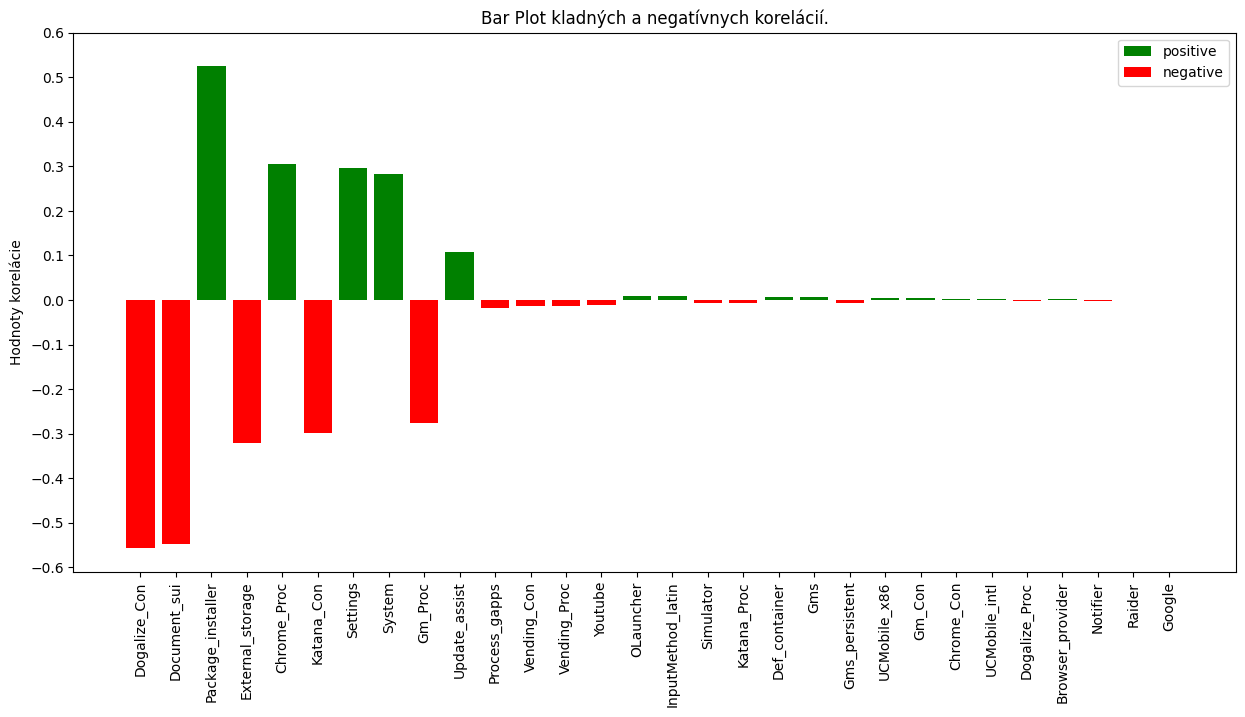

In [90]:
mwra_corr_new = con_proc_corr_new['Malware'].drop('Malware')


mwra_corr_new = pd.DataFrame({"values": mwra_corr_new, "absolute_values": mwra_corr_new.abs()})
mwra_corr_new.sort_values(by=["absolute_values"], inplace=True, ascending=False)
mwra_corr_new = mwra_corr_new["values"]

index = np.arange(len(mwra_corr_new))

plt.subplots(figsize=(15, 7))

plt.bar(index[mwra_corr_new >= 0], mwra_corr_new[mwra_corr_new >= 0], color="green", label="positive")
plt.bar(index[mwra_corr_new < 0], mwra_corr_new[mwra_corr_new < 0], color="red", label="negative")

plt.xticks(index, mwra_corr_new.index, rotation=90)
plt.yticks(np.arange(-0.6, 0.7, 0.1))
plt.title('Bar Plot kladných a negatívnych korelácií.')
plt.ylabel("Hodnoty korelácie")
plt.legend()
plt.show()

### Vidíme, že poradie 9 najsilnejších korelácií s predikovanou premennou zostalo rovnaké.
### Na základe toho, môžeme priamo porovnať tieto korelácie s pôvodnými koreláciami.

#
### Pre lepšie porovnanie rozdielov korelácií sme vypočítané hodnoty zobrazili číselne.

In [91]:
print(f'{"attribute":>14} {"before":>23} {"now":>10} {"diff":>12} {"% diff":>10}\n')
i=0
for i in range(len(mwra_corr.index)):
    name = mwra_corr.index[i]

    difference = abs(mwra_corr_new.iloc[i]-mwra_corr.iloc[i])
    percent_diff = abs(difference / mwra_corr.iloc[i] * 100)

    prefix = "-" if mwra_corr_new.iloc[i] < 0 else " "

    print(f'{name:<27} |  {prefix}{abs(mwra_corr.iloc[i]):.5f}  |  {abs(mwra_corr_new.iloc[i]):.5f}  |  {difference:.5f}  |  {percent_diff:.1f}')

    i+=1
    if i==9:
        break

     attribute                  before        now         diff     % diff

c.dogalize                  |  -0.55555  |  0.55577  |  0.00022  |  0.0
p.android.documentsui       |  -0.54637  |  0.54663  |  0.00026  |  0.0
p.android.packageinstaller  |   0.52358  |  0.52424  |  0.00066  |  0.1
p.android.externalstorage   |  -0.31925  |  0.32046  |  0.00122  |  0.4
p.android.chrome            |   0.30537  |  0.30517  |  0.00021  |  0.1
c.katana                    |  -0.29904  |  0.29887  |  0.00017  |  0.1
p.android.settings          |   0.29589  |  0.29631  |  0.00042  |  0.1
p.system                    |   0.28390  |  0.28380  |  0.00011  |  0.0
p.android.gm                |  -0.27493  |  0.27623  |  0.00129  |  0.5


### Z hodnôt vidíme, že percentuálny rozdiel v koreláciách je menší ako `1%`.
### Na základe toho `H0` neodmietame.

#
## *B) Overte či Vaše štatistické testy majú dostatočne silnú štatistickú silu.*

### Veľkosti vzoriek:
- #### Pri `Hypotéze 1`, kde je vzorka DF `Connections` sme počas EDA odstránili celkovo 22 záznamov. Takisto sme v `Youtube` 37 outlier-ov zmenili na hraničné hodnoty a v `Dogalize` 35 outlier-ov. Pri celkovom počte záznamov `14 961` to predstavuje nízky vplyv.
###
- #### Pri `Hypotéze 2`, kde sme analyzovali atribúty z DF `Connections` (14961 záz.) a `Processes` (14983 záz.), sa veľkosť vzorky zmenila rovnako ako v `Hyp. 1` len pre `Connections`. Takisto sme v `Processes` v 9 atribútoch menili hodnoty outlier-ov na hraničné hodnoty. Počet outlierov však nepresiahol `2%` v každom atribúte.
###
### Nevidíme dôvod, aby naše testy nemali nedostatočnú štatistickú silu.

#
# EXTRA

In [92]:
# con.to_csv('dataset82_edited/Connections.csv', index=False)
# proc.to_csv('dataset82_edited/Processes.csv', index=False)
# dev.to_csv('dataset82_edited/Devices.csv', index=False)
# prof.to_csv('dataset82_edited/Profiles.csv', index=False)